In [2]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort3")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-01-26 16:20:13,968][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-01-26 16:20:14,293][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [3]:
# ANIMALS
ANIMAL_IDS = [
    "R030",
    "R031",
    "R032",
    "R033",
    "R034",
    "R035",
    "R036",
    "R037",
    "R038",
    "R039",
]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [4]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 19 sessions for R030 between 2024-01-05 and 2024-01-25
fetched 20 sessions for R031 between 2024-01-05 and 2024-01-25
Not all variables are the same length. Cannot create proper DataFrame
result: 148
hits: 148
violations: 148
temperror: 148
hit_rate: 147
error_rate: 147
violation_rate: 147
temp_error_rate: 147
n_lpokes: 147
n_cpokes: 147
n_rpokes: 147
trial_dur: 147
trial_start: 147
valid_early_spoke: 147
first_spoke: 147
first_lpoke: 147
first_rpoke: 147
n_settling_ins: 147
avg_settling_in: 147
cpoke_dur: 147
wf_cpoke_dur: 147
n_incorr_spokes_during_give_del: 147
stage: 147
curriculum: 147
sides: 148
SMA_set: 147
is_match: 148
sa: 147
sb: 147
stimuli_on: 147
settling_in_dur: 147
legal_cbreak_dur: 147
pre_dur: 147
adj_pre_dur: 147
stimulus_dur: 147
delay_dur: 147
post_dur: 147
sb_extra_dur: 147
viol_off_dur: 147
pre_go_dur: 147
inter_trial_dur: 147
go_type: 147
go_dur: 147
give_type_set: 147
give_type_imp: 147
give_frac: 147
give_delay_dur: 147
give_xtra_light_delay_dur: 147
gi

In [5]:
date_min

'2024-01-05'

In [6]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R3s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min="2024-01-04",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2024-01-04 -> 2024-01-25
Returning appended df with entries between 2024-01-04 and 2024-01-25
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R3s_days_df.csv


R030
R031
R032
R033
R034


/Users/jessbreda/Desktop/github/jbreda_animal_training/code/training_performance/plot_days_info.py:985: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R035
R036
R037
R038
R039


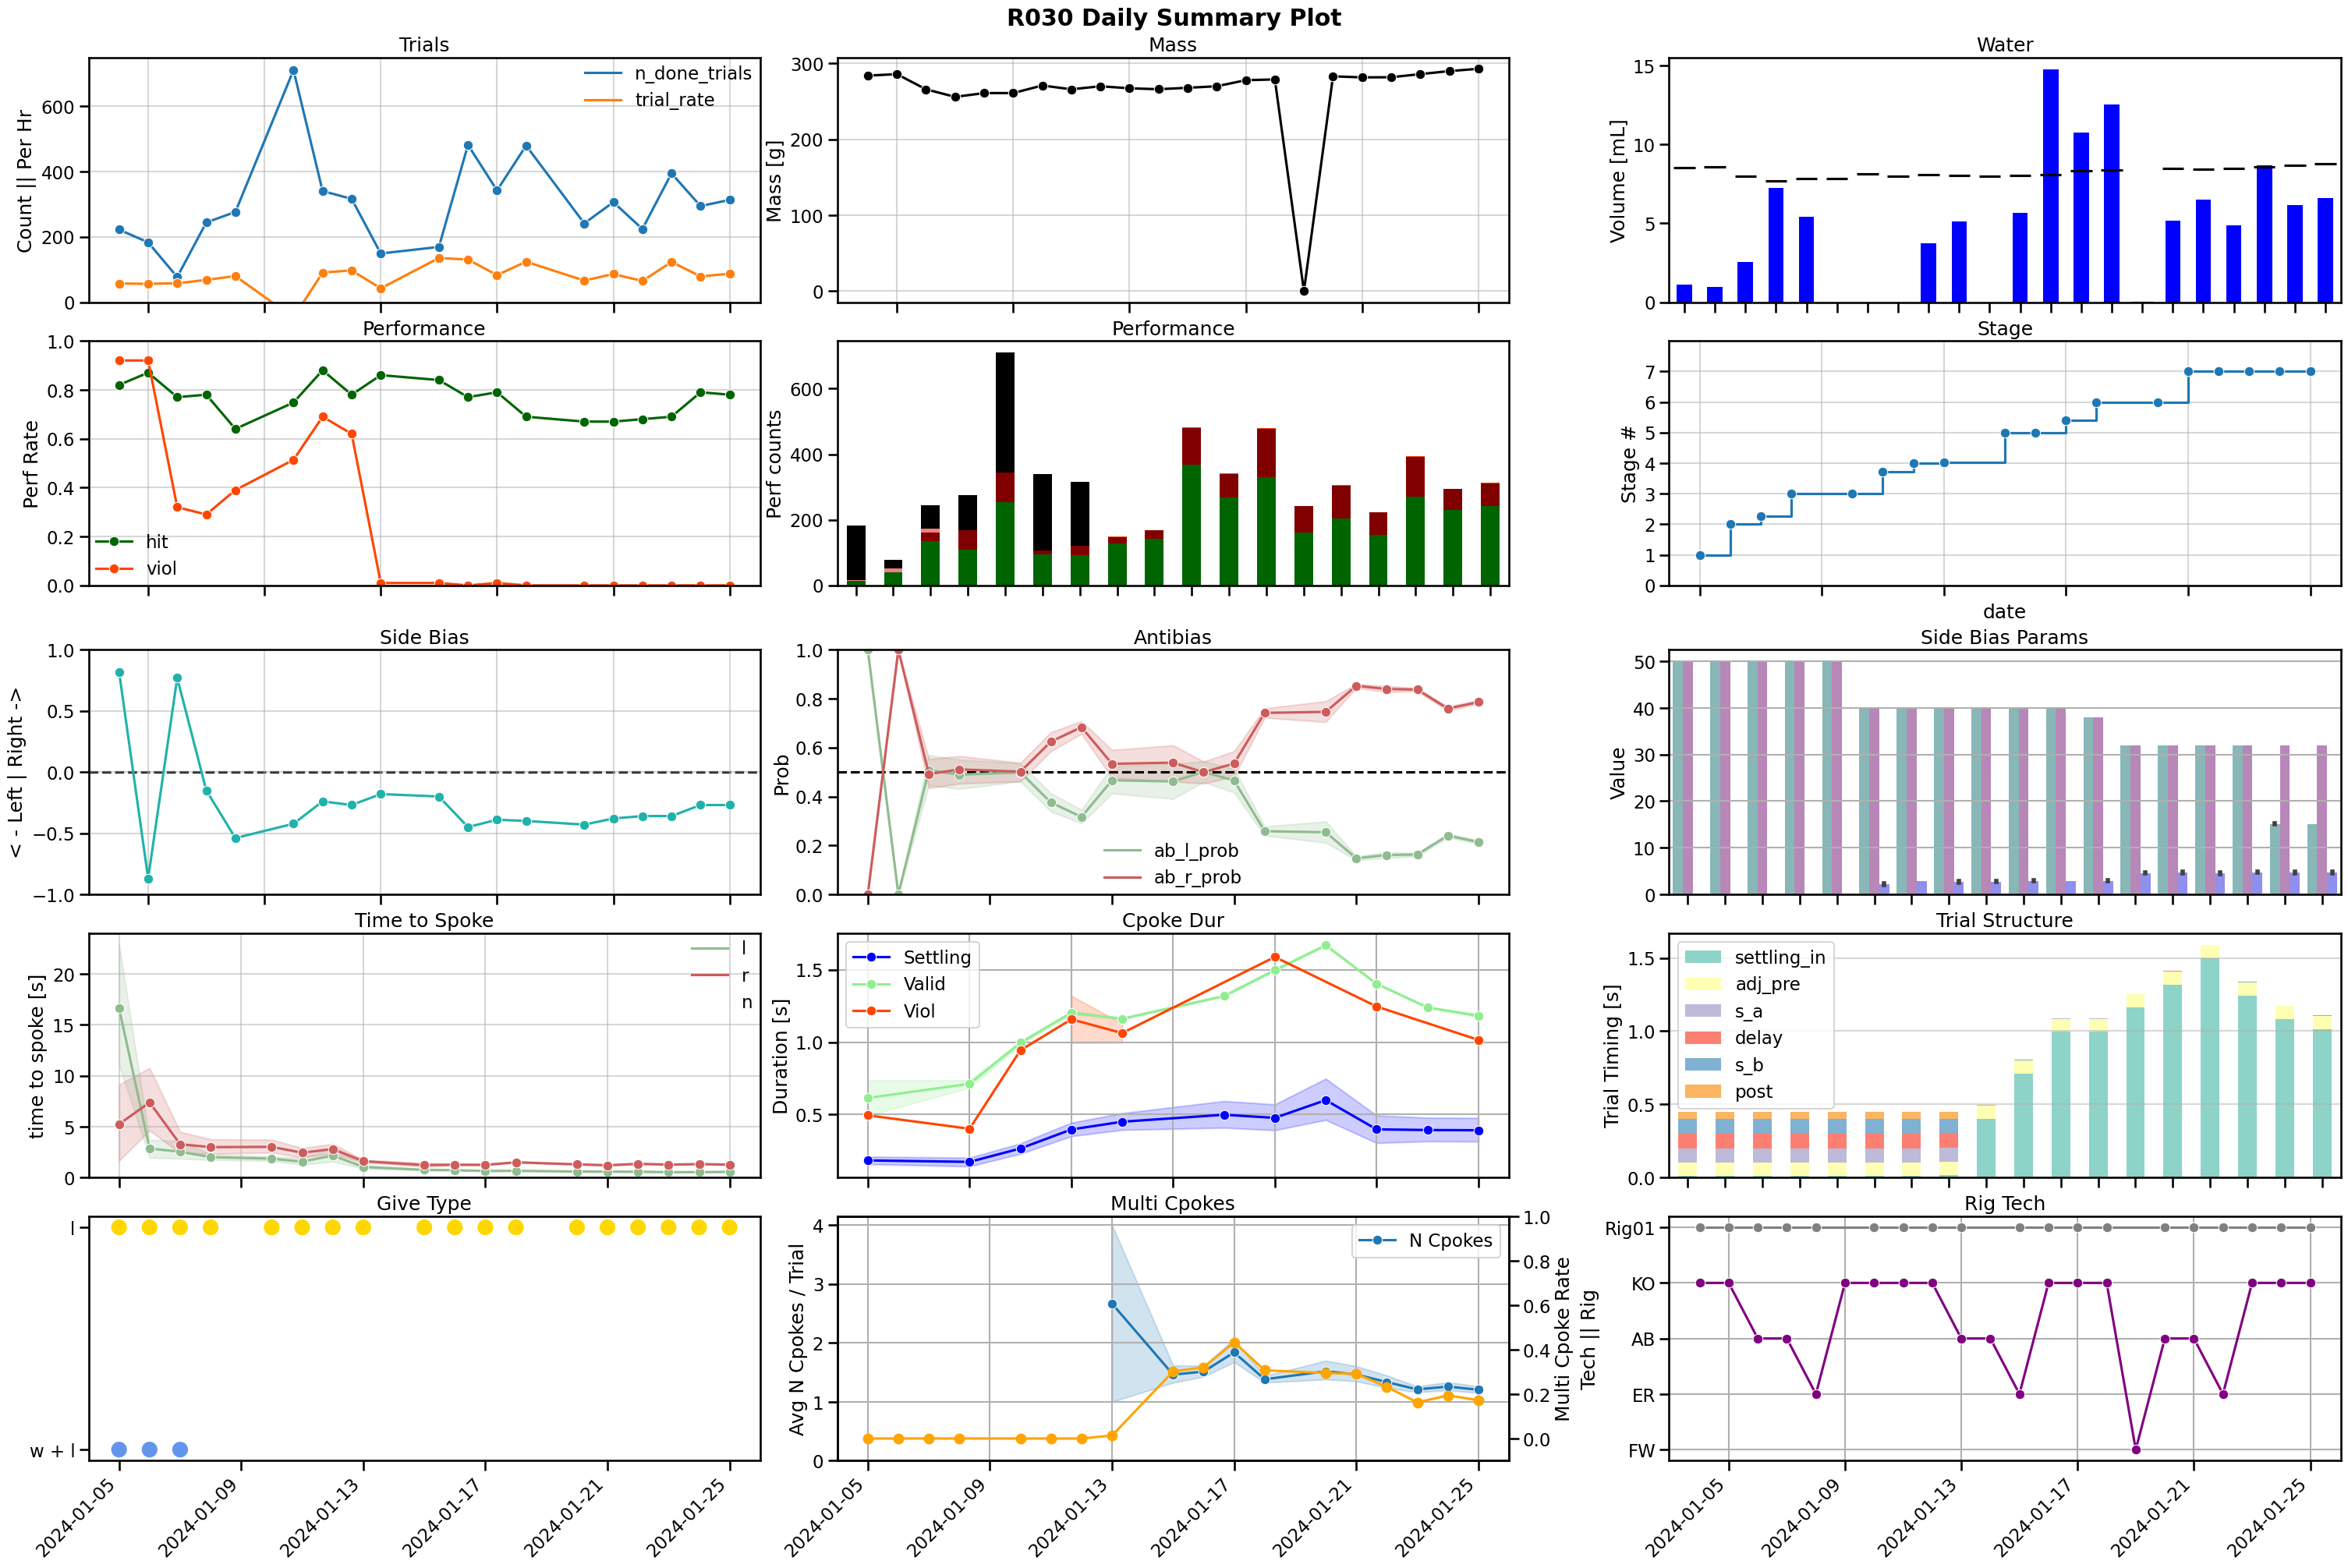

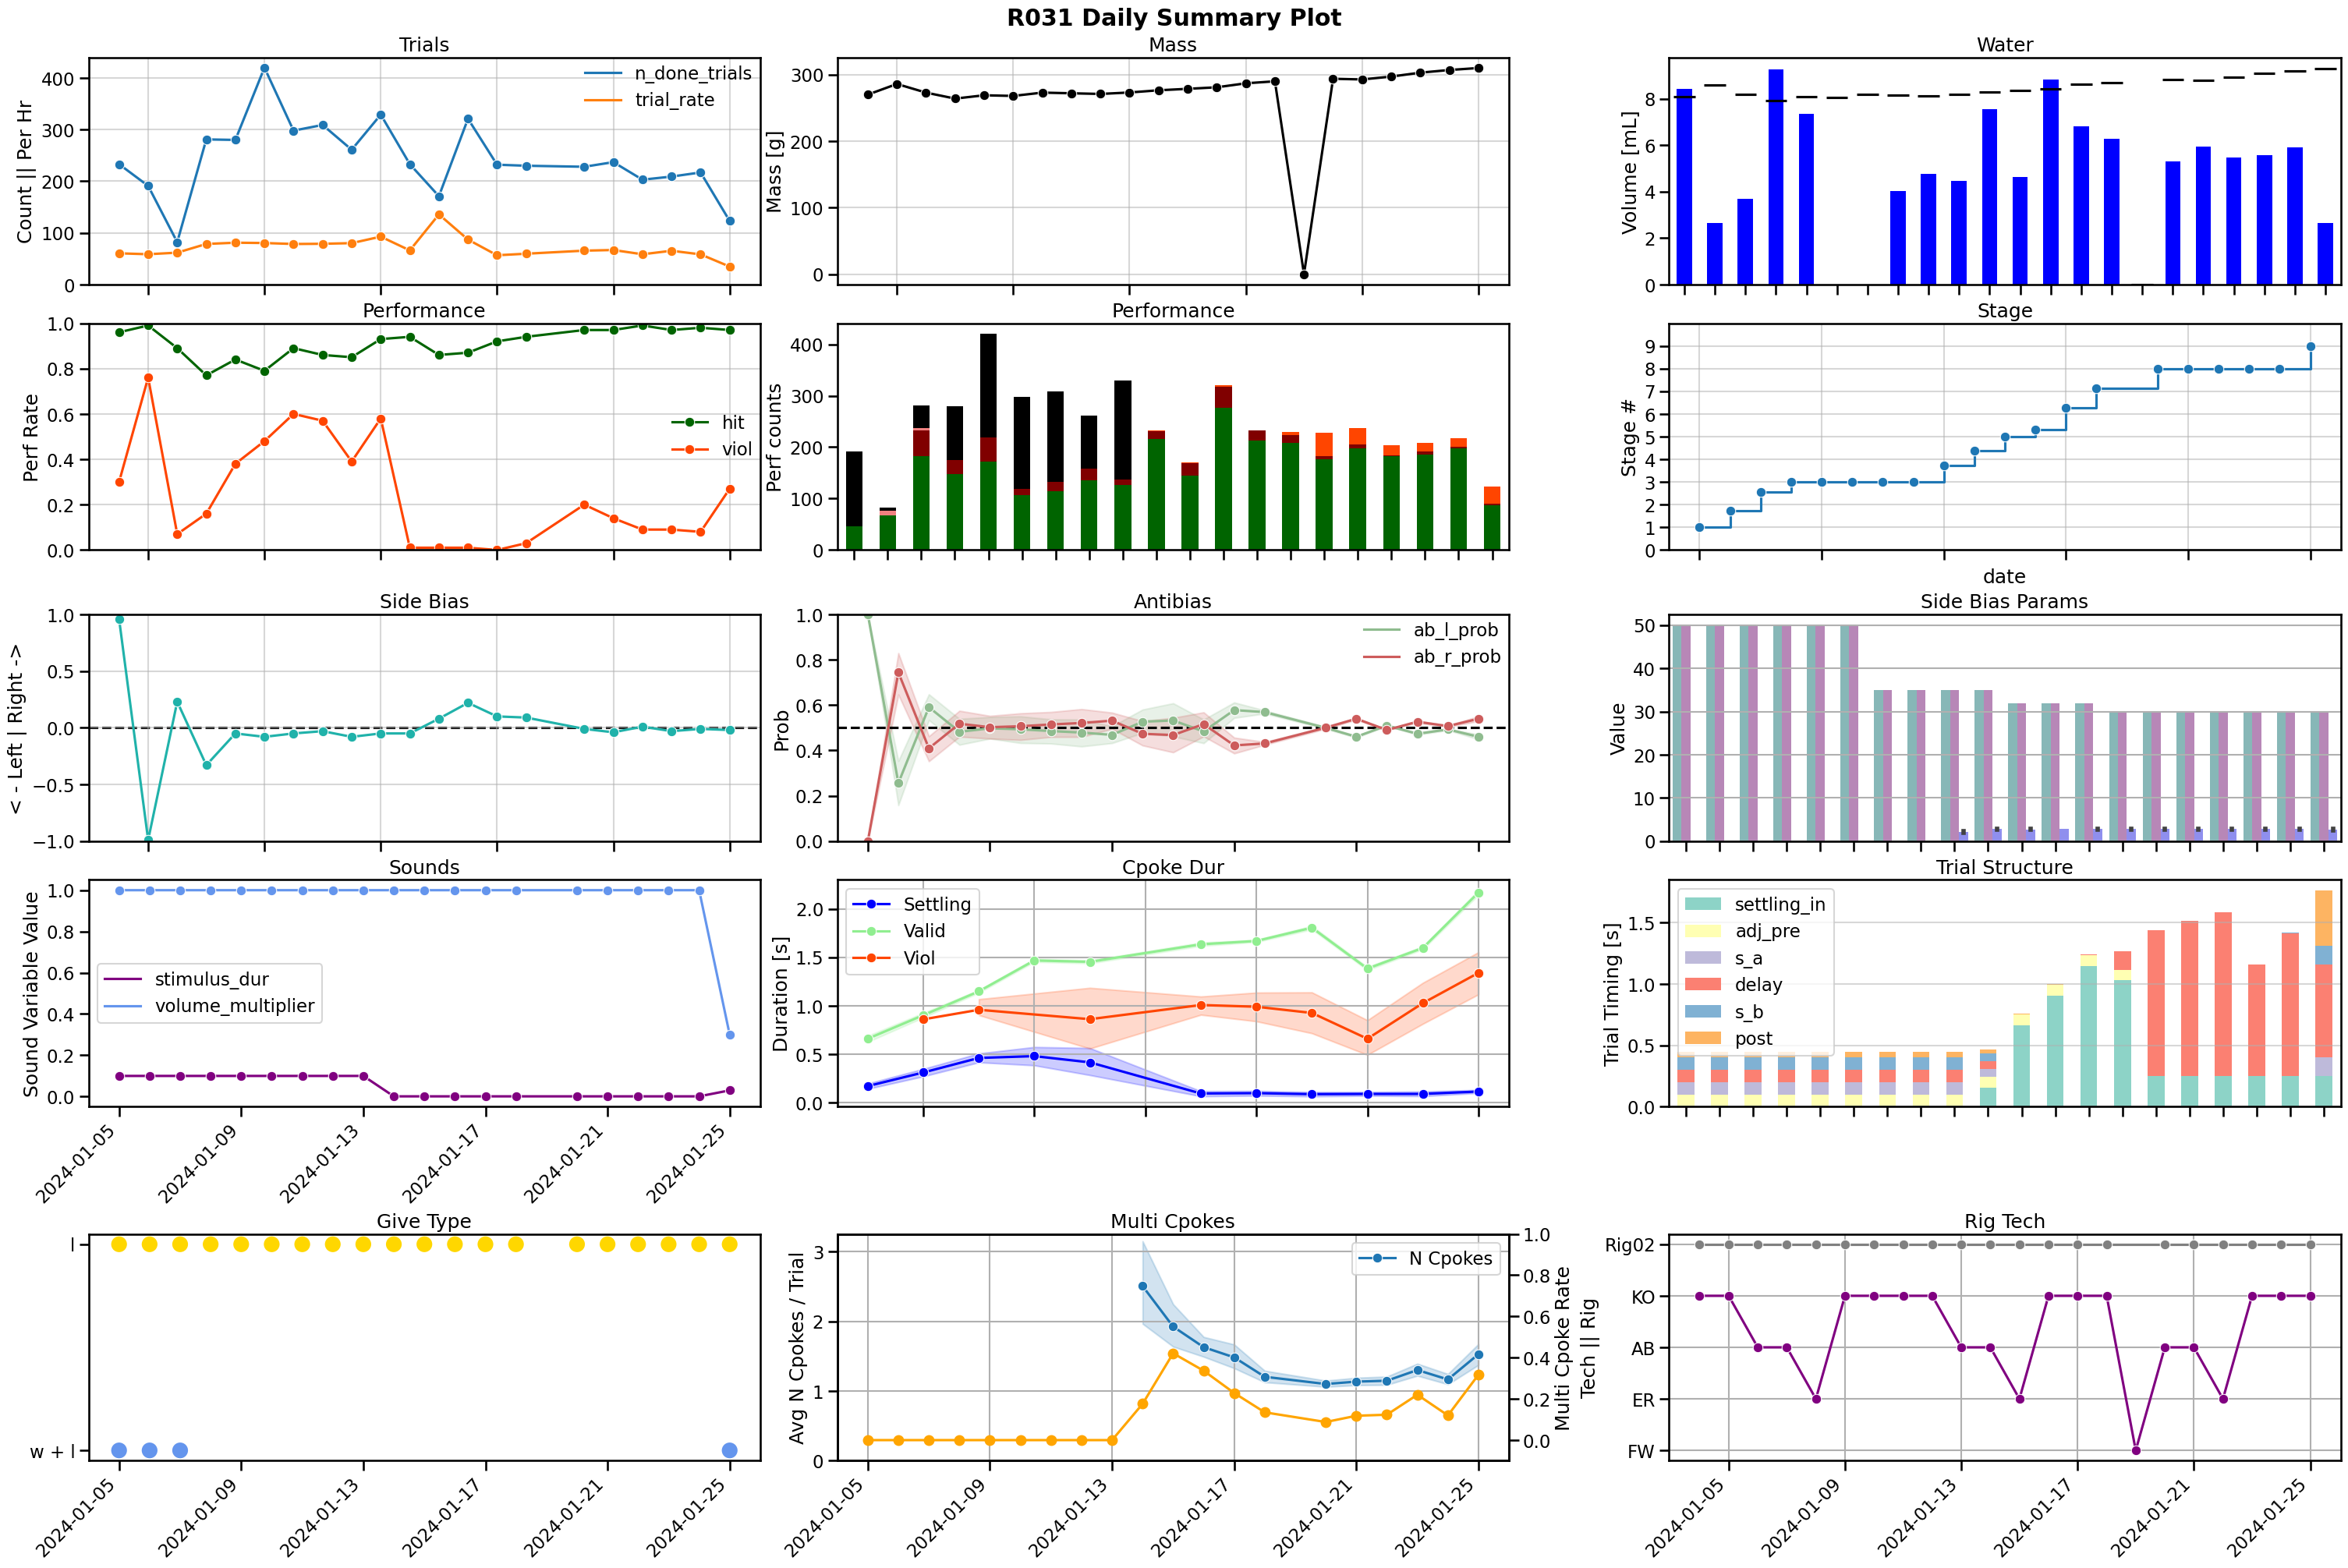

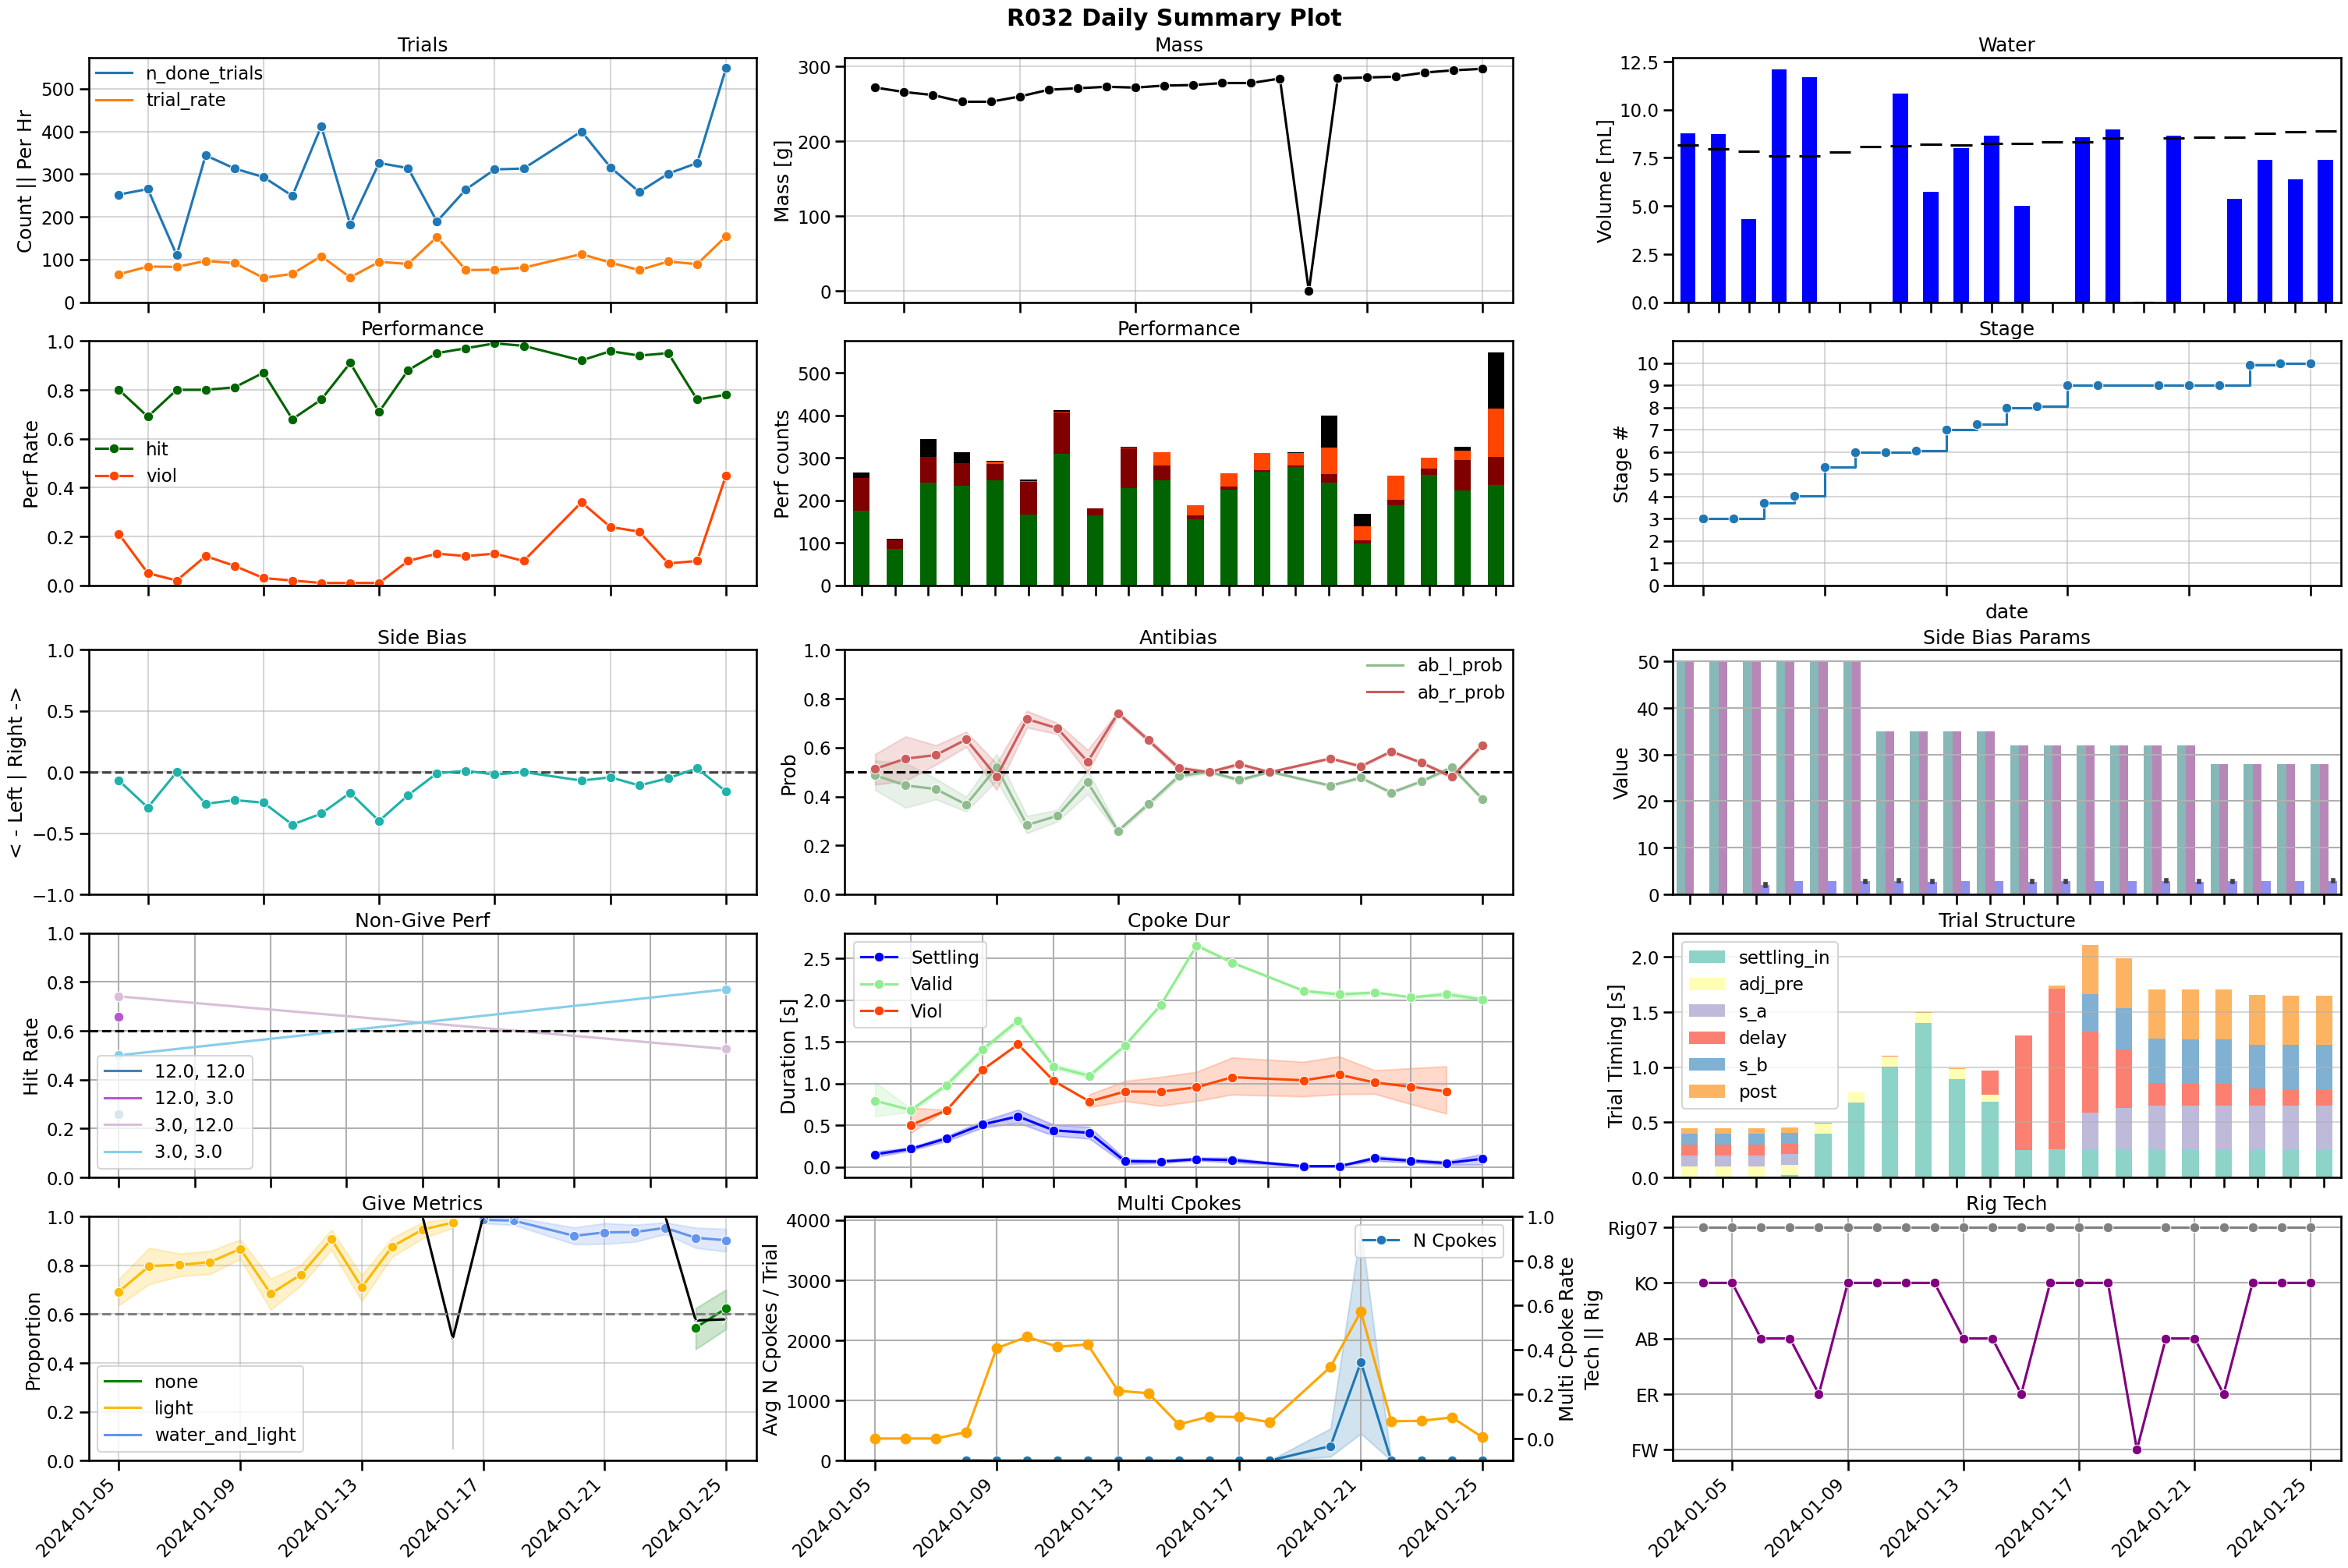

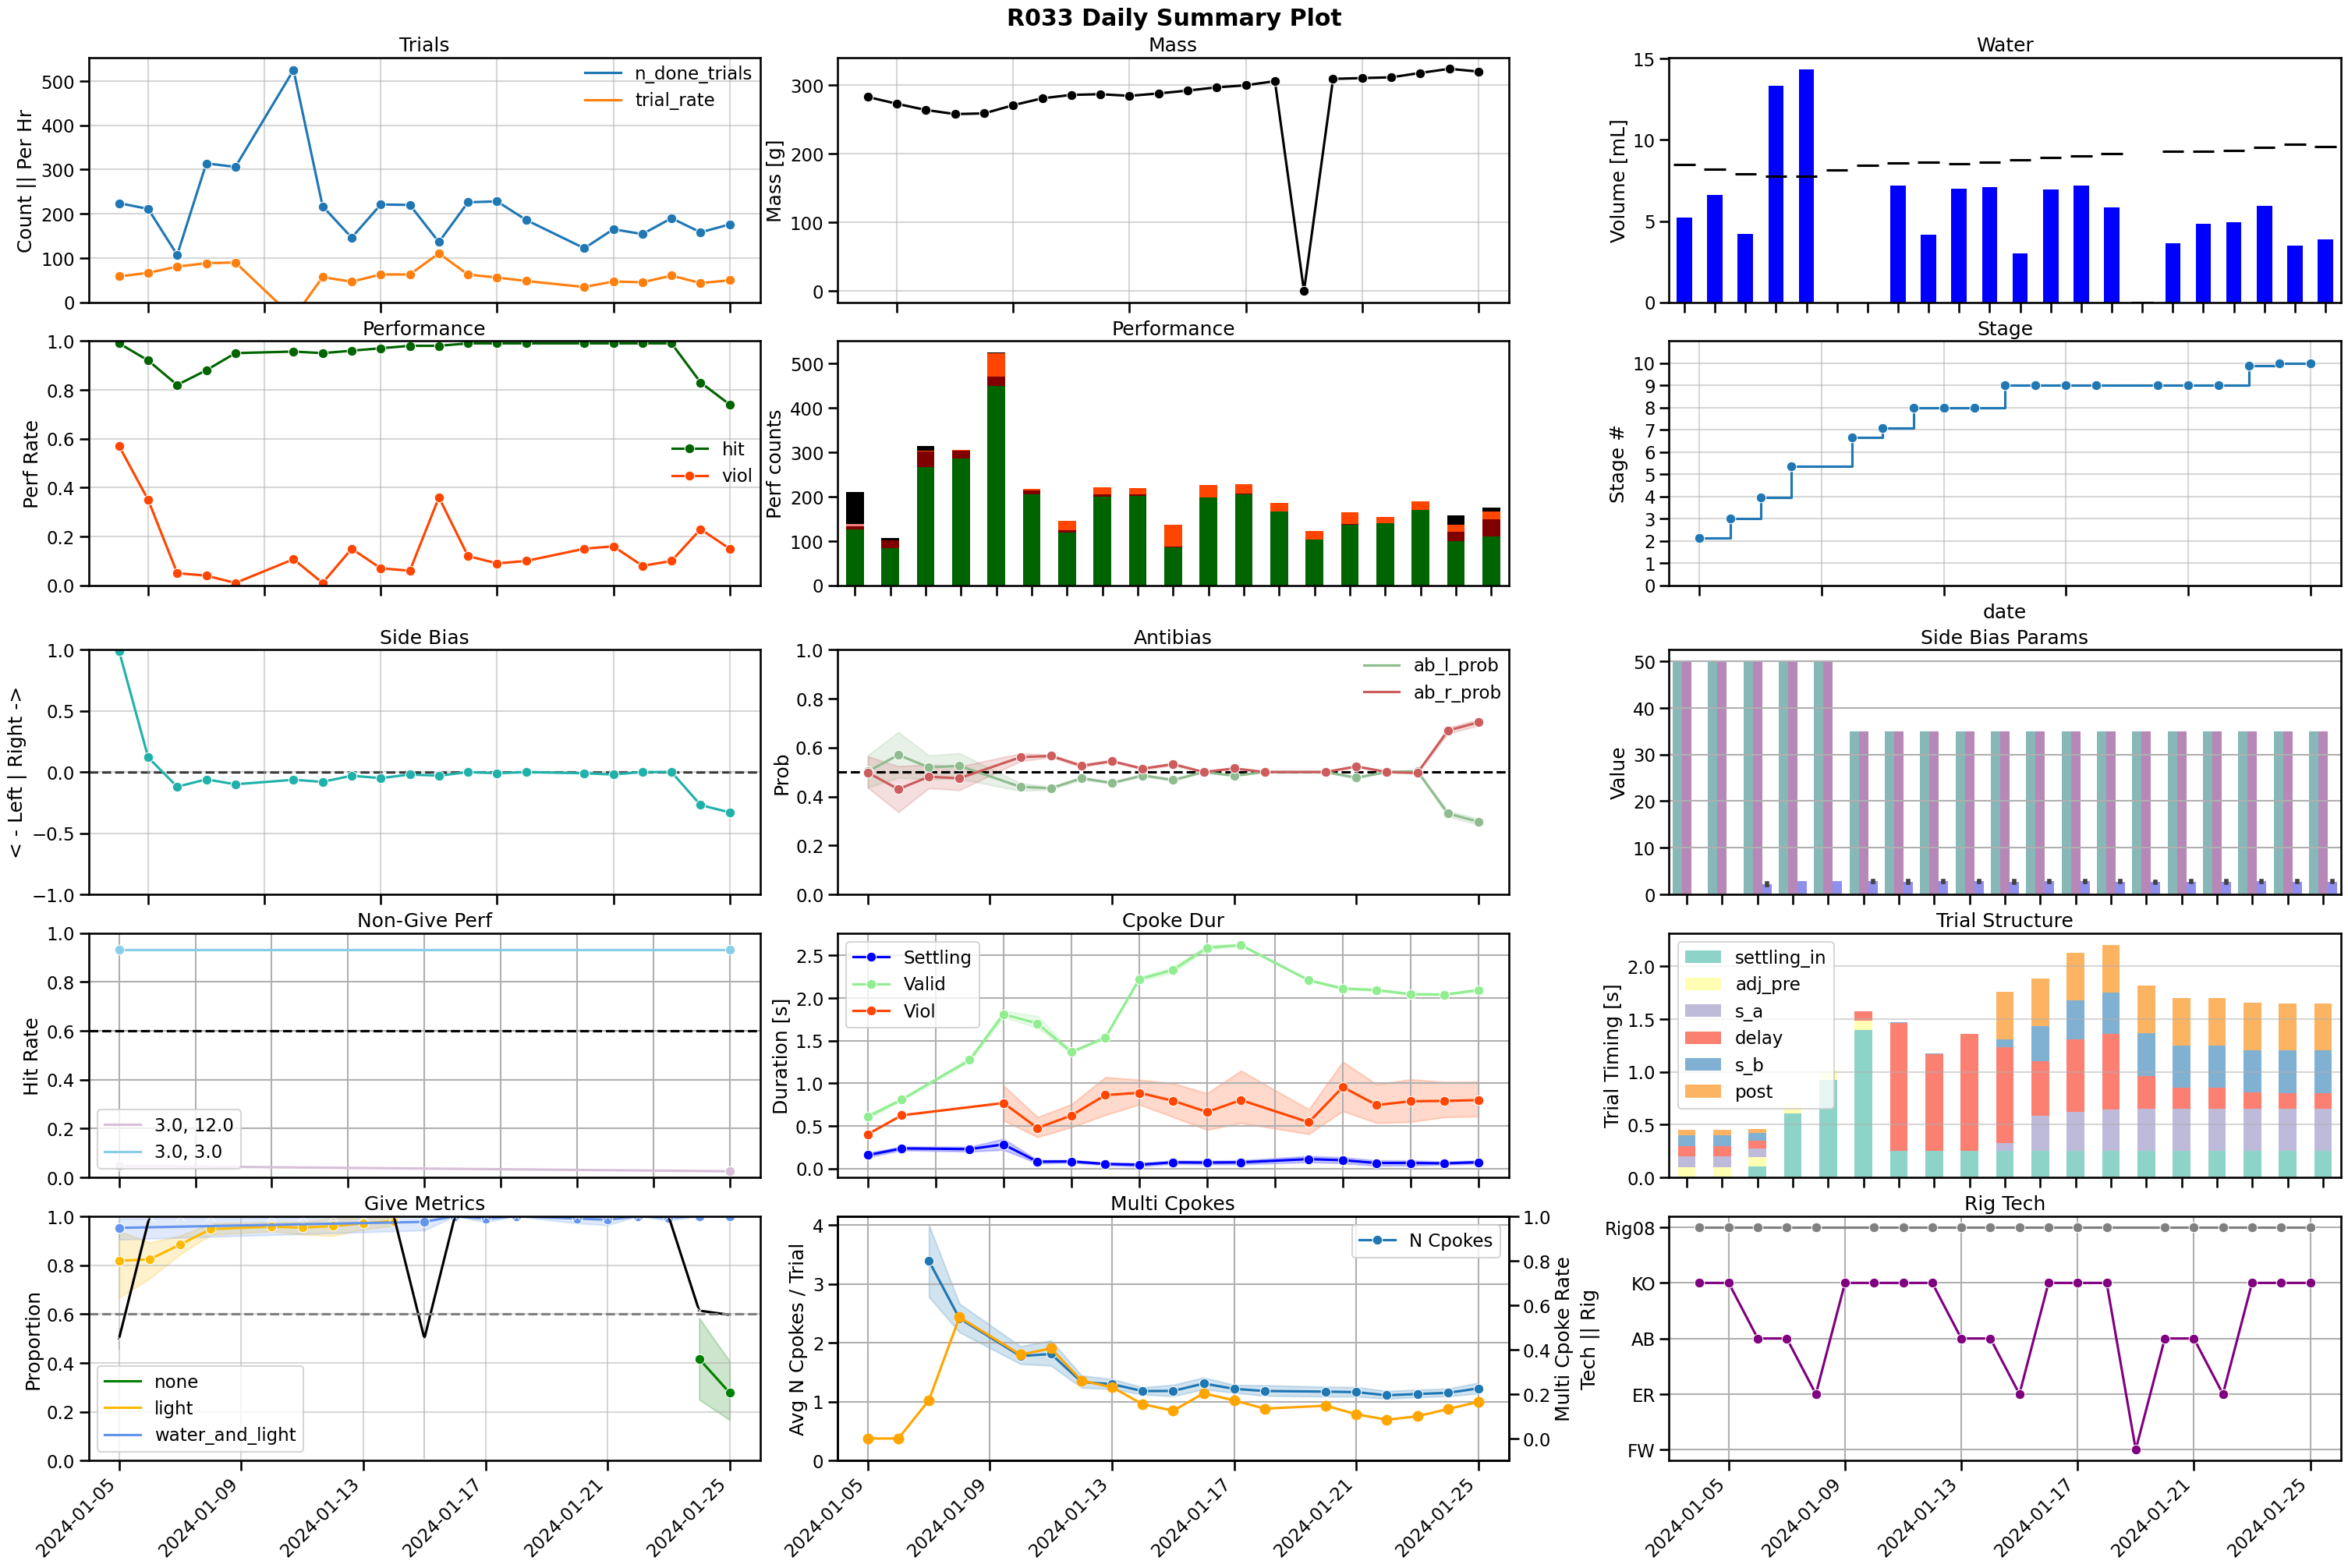

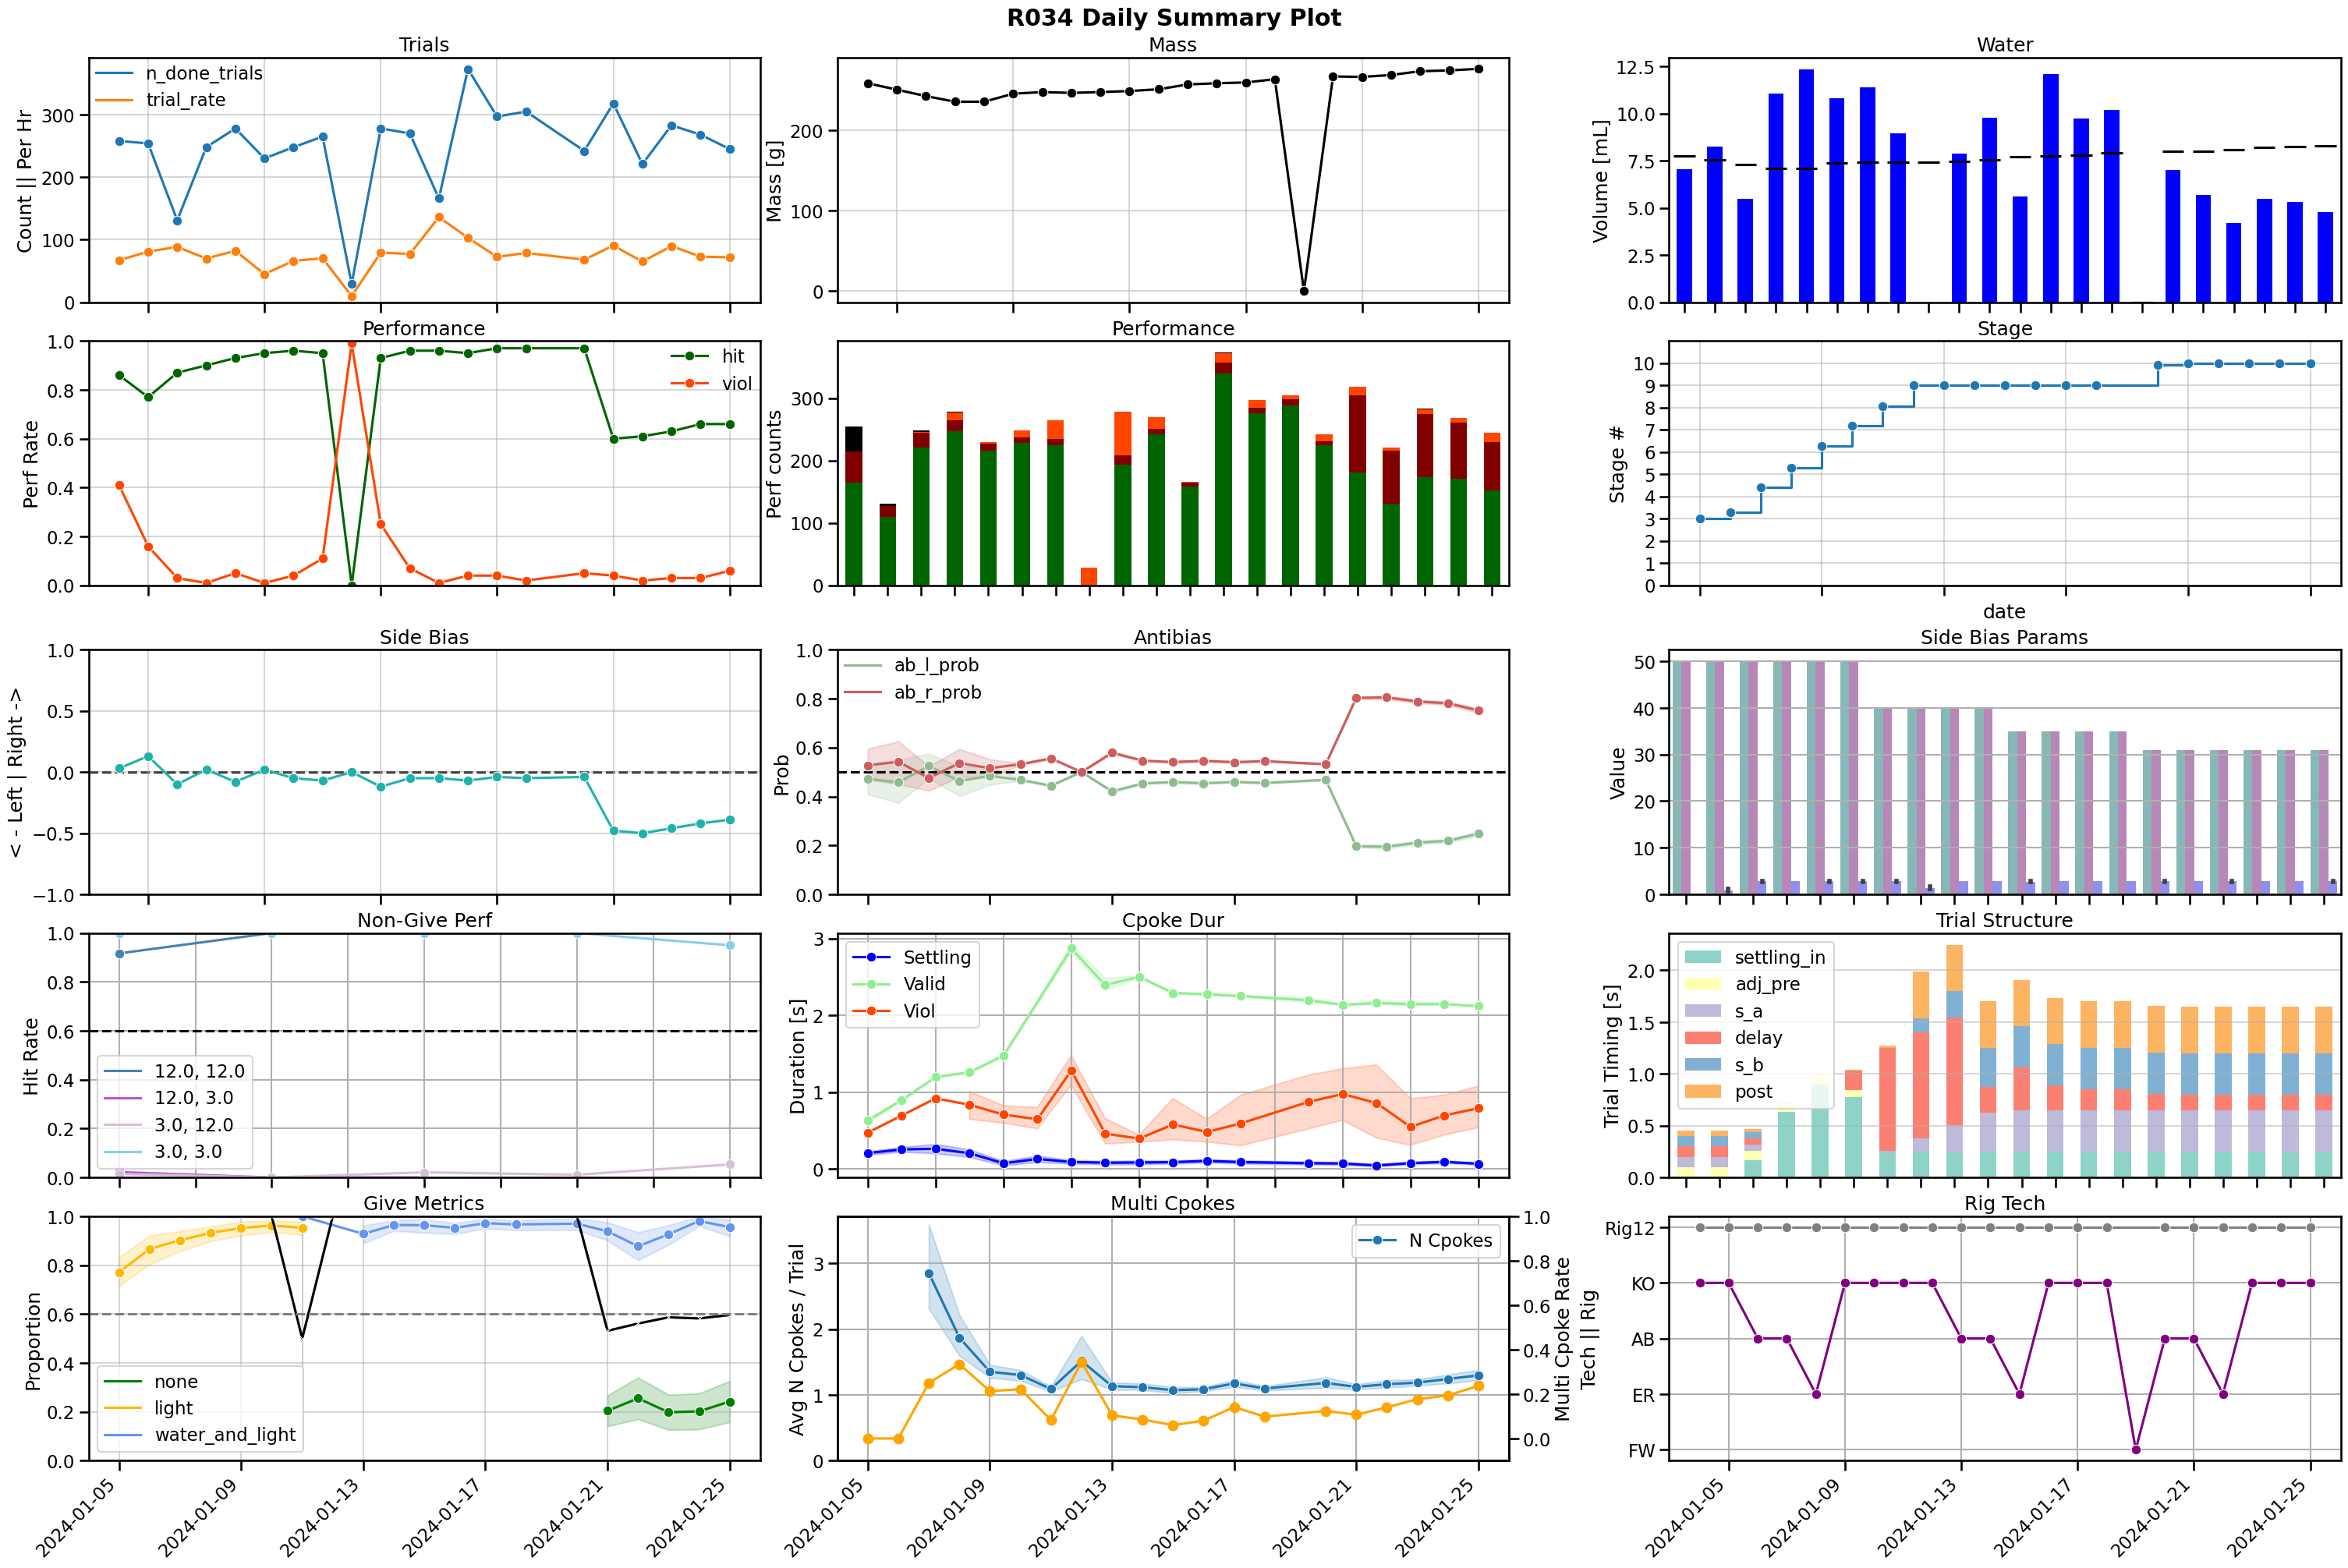

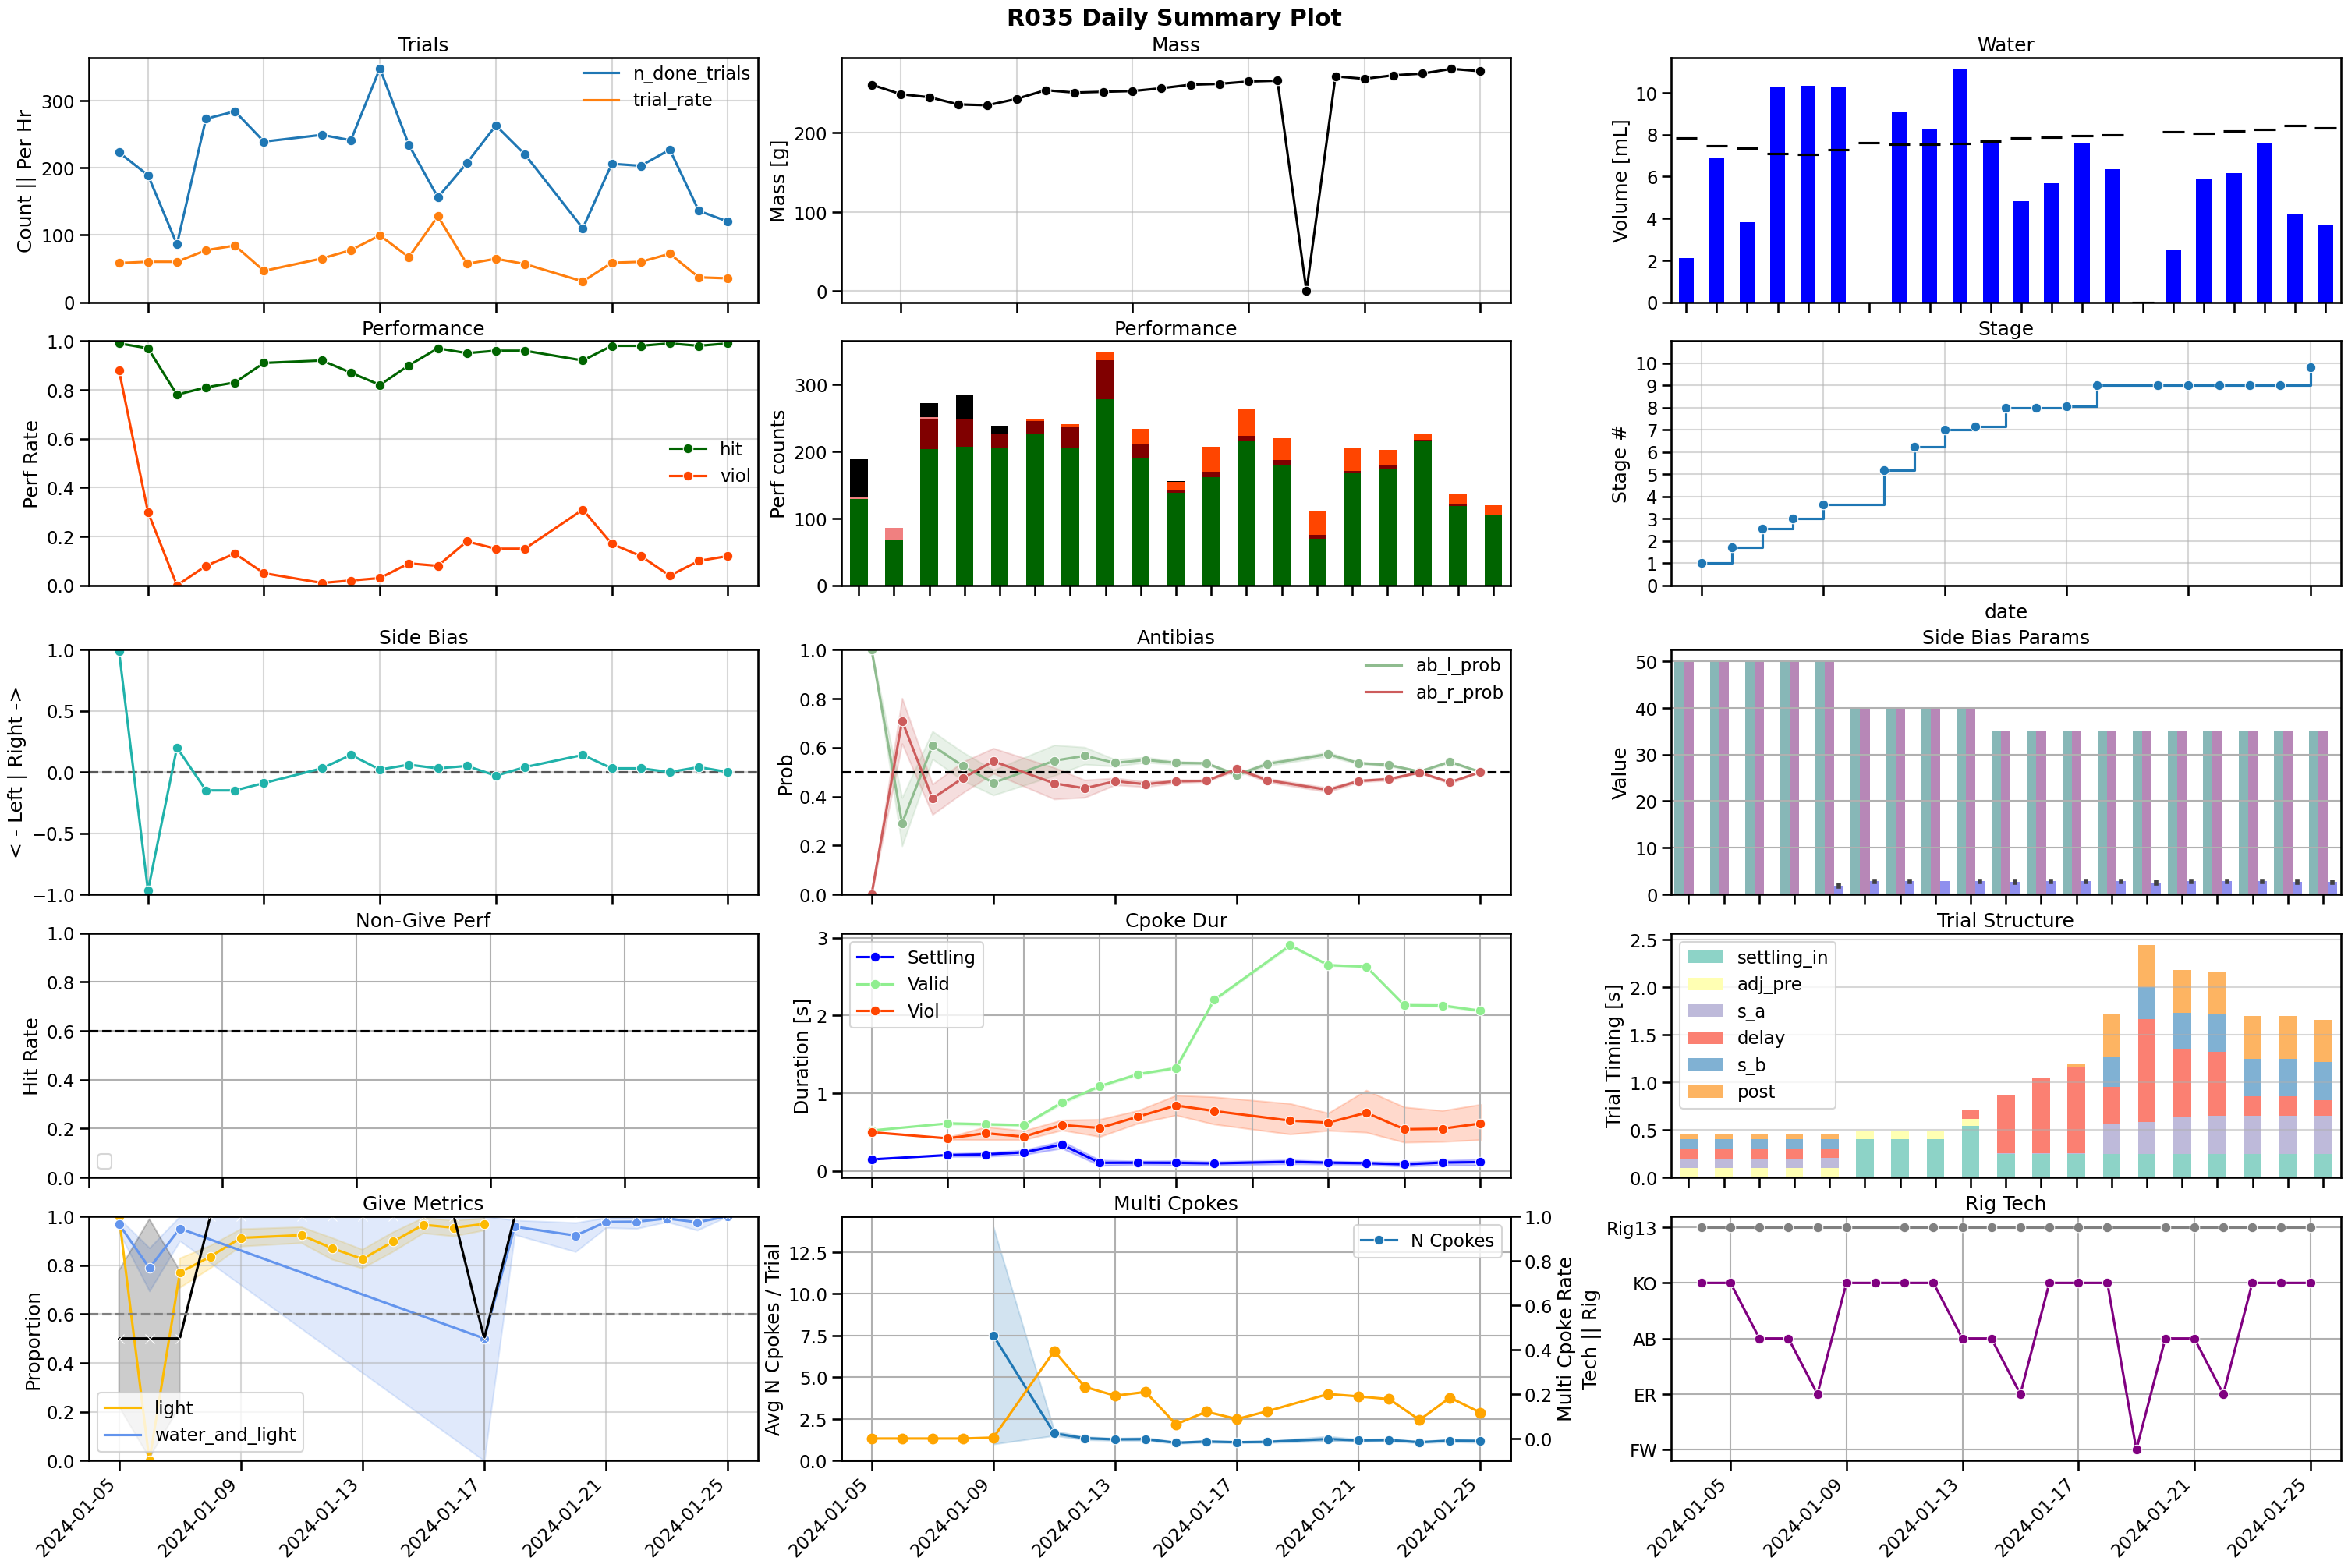

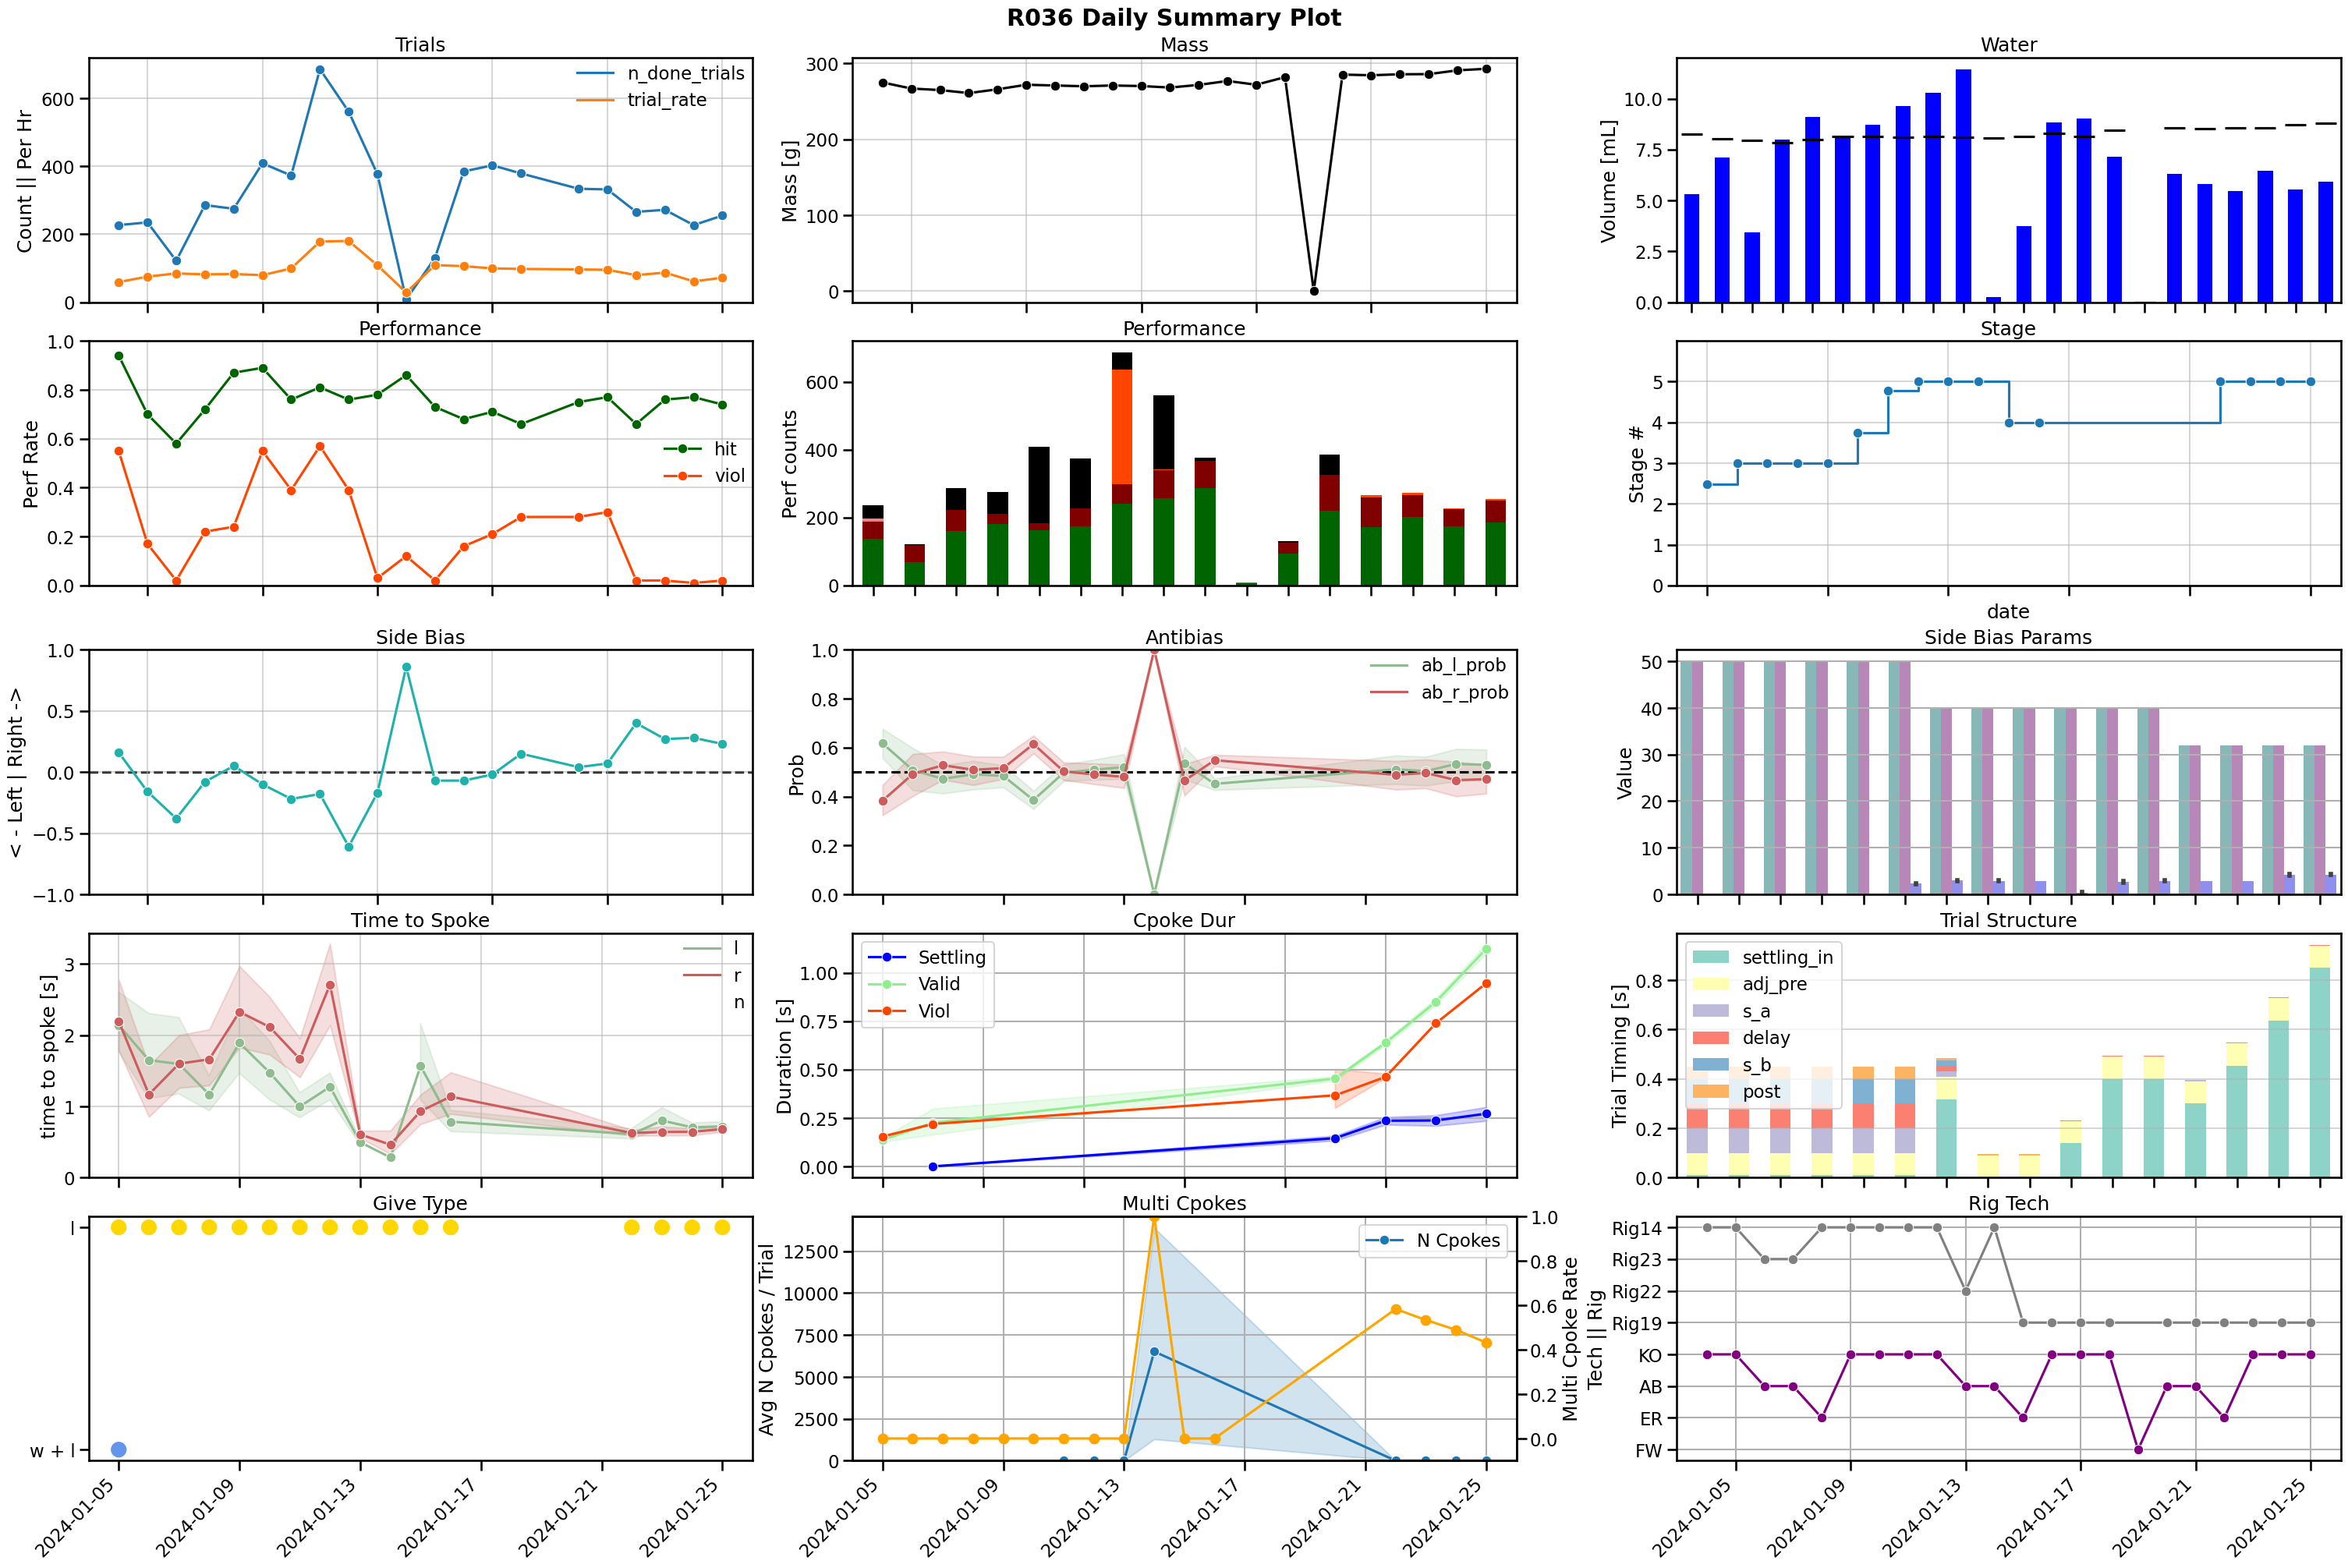

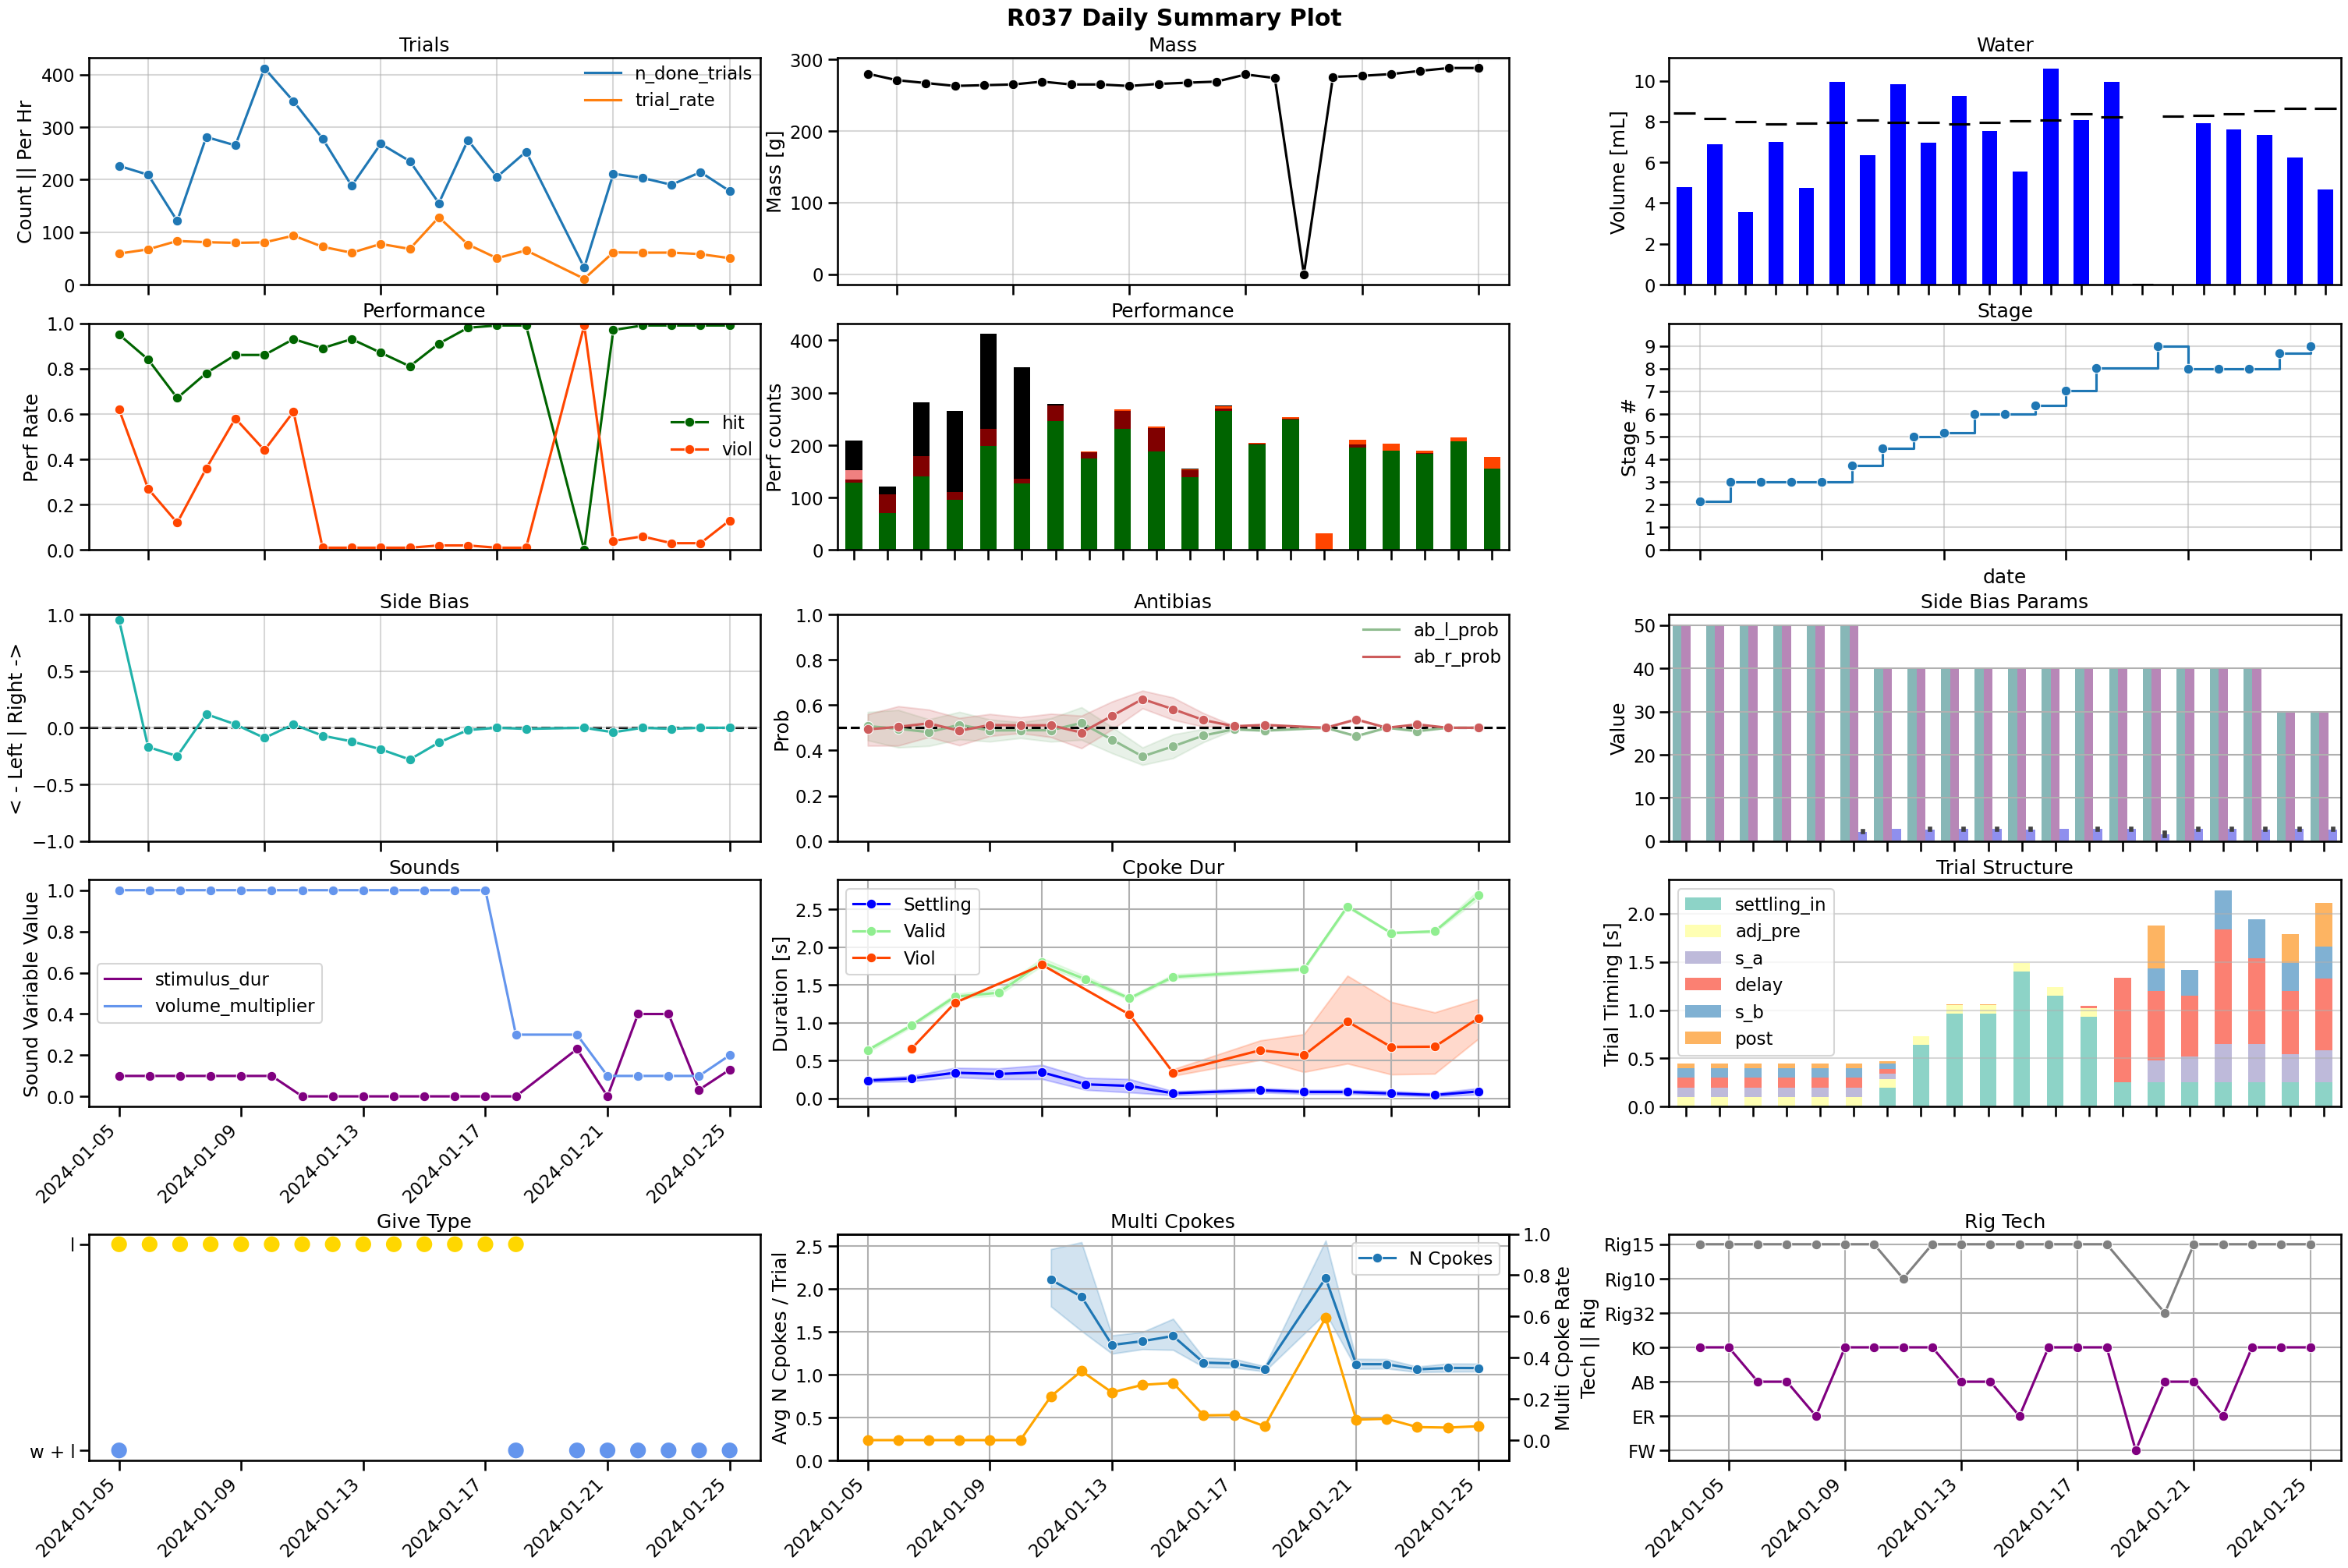

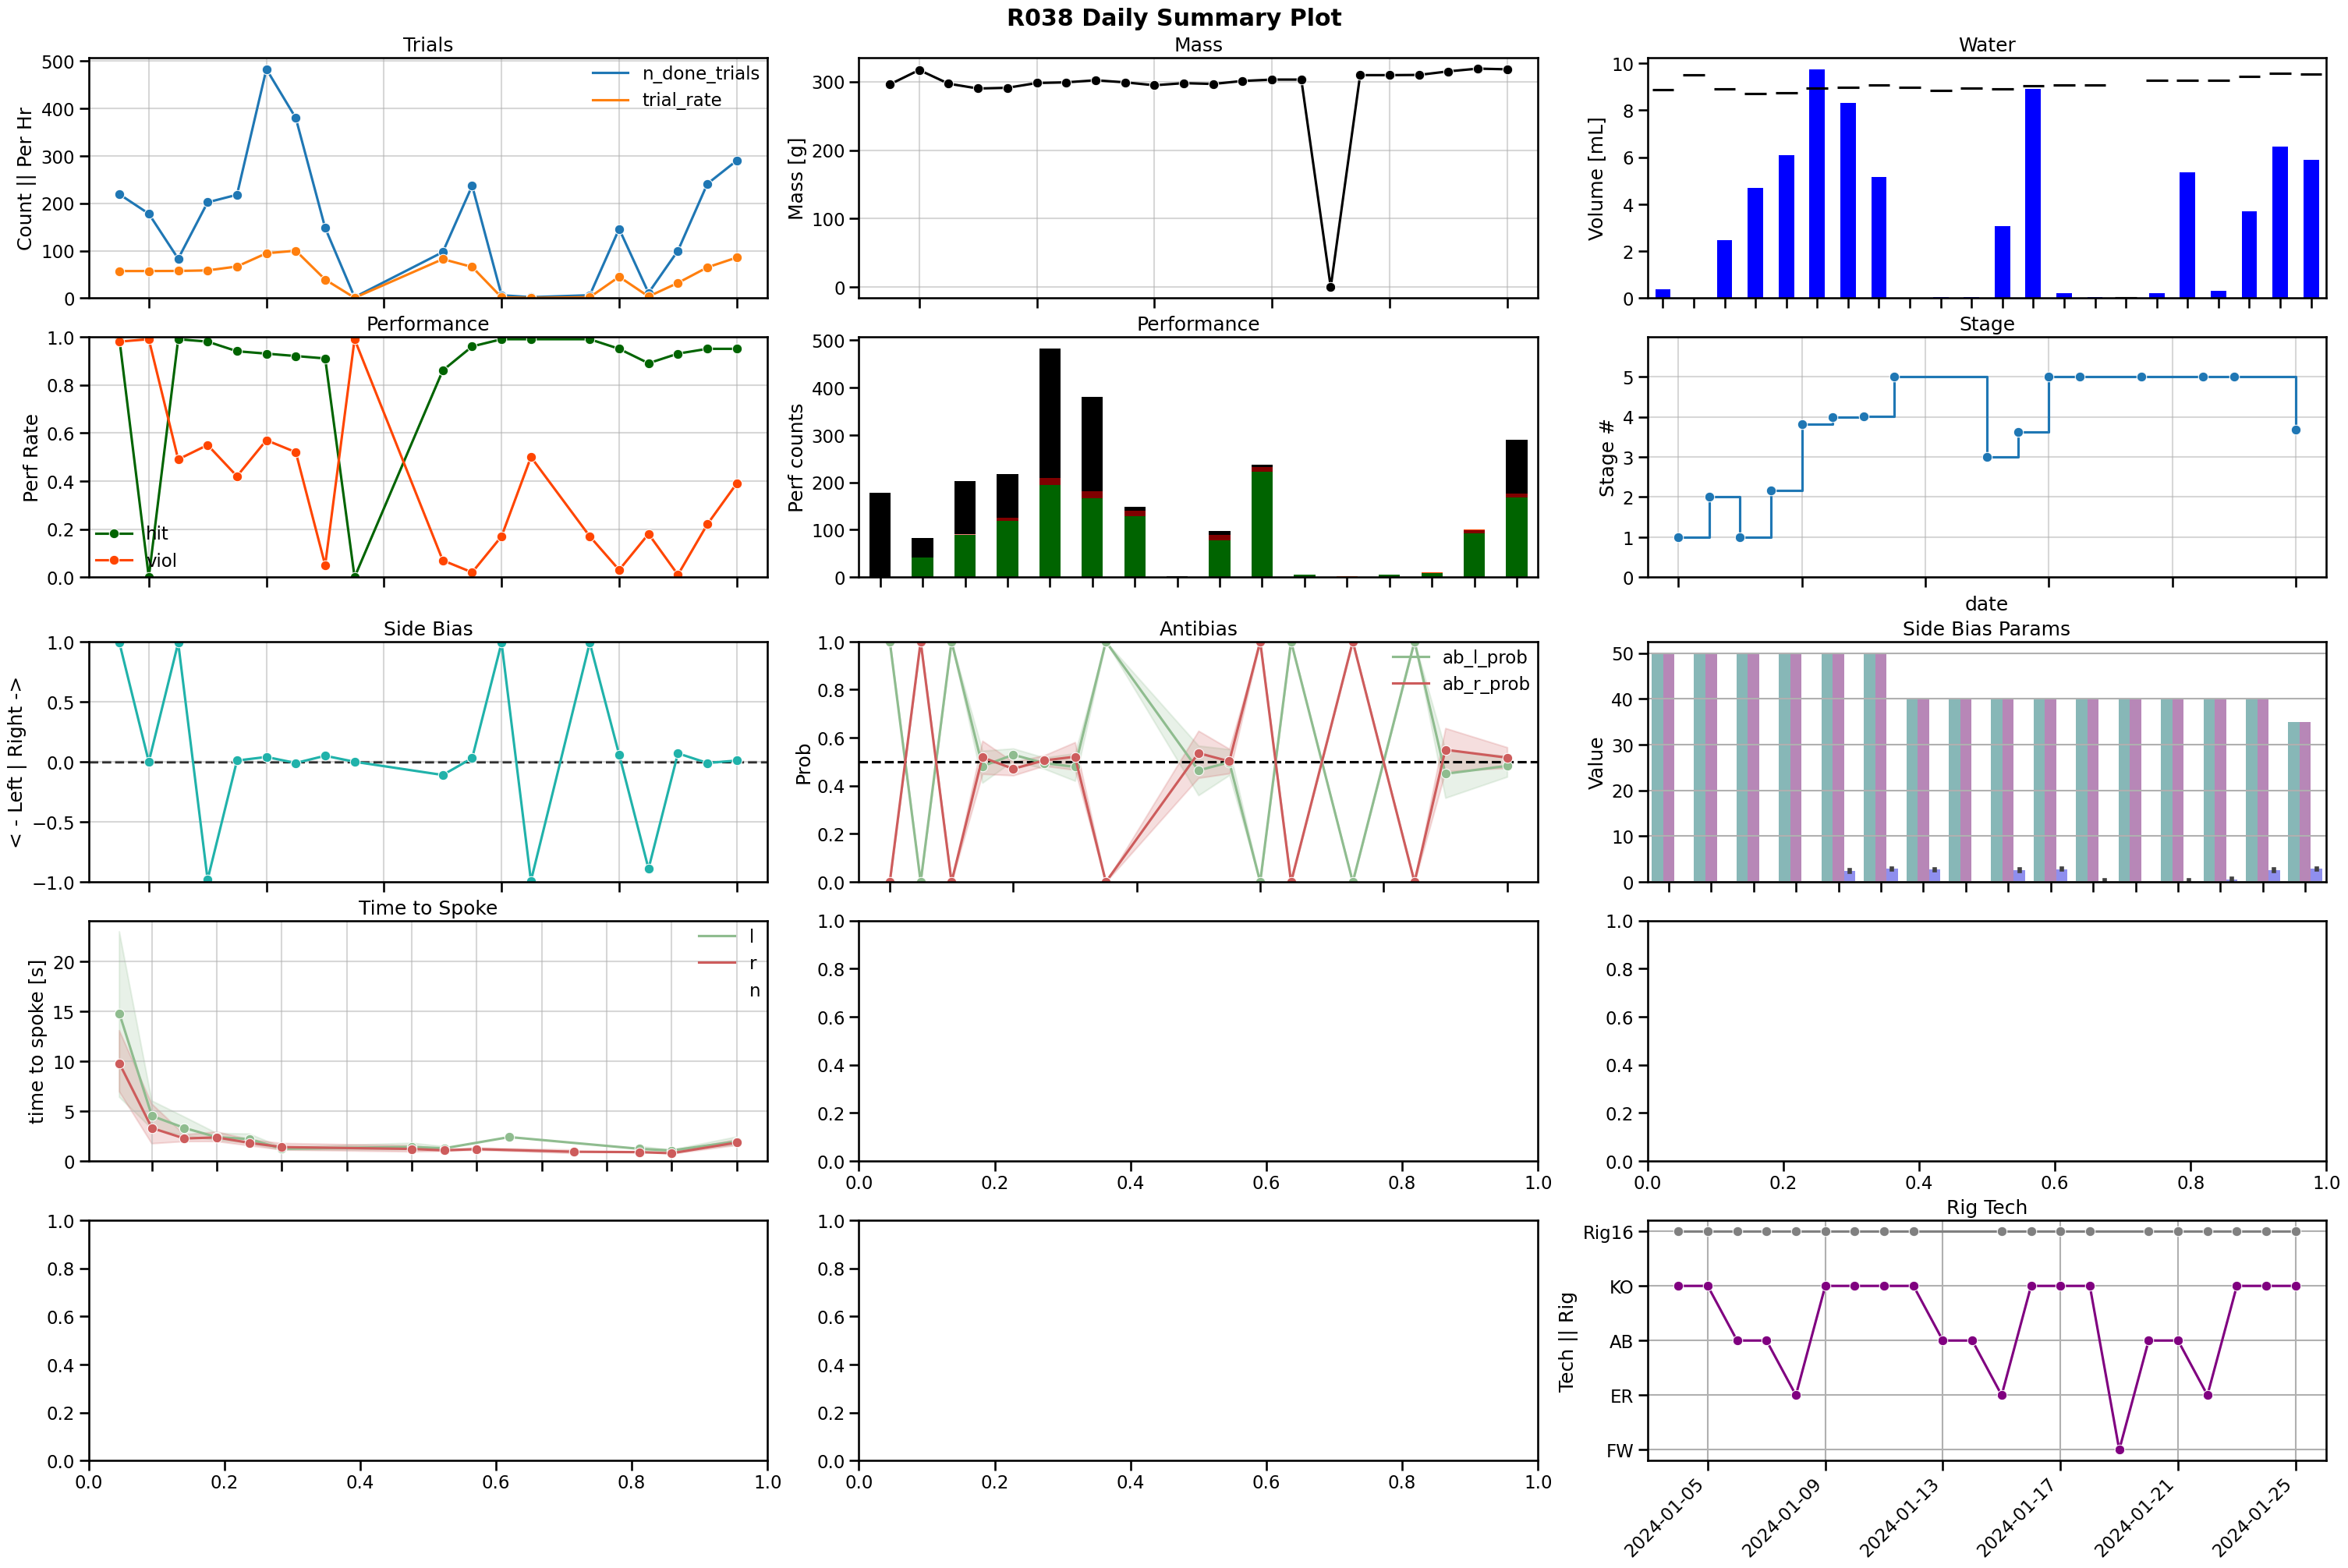

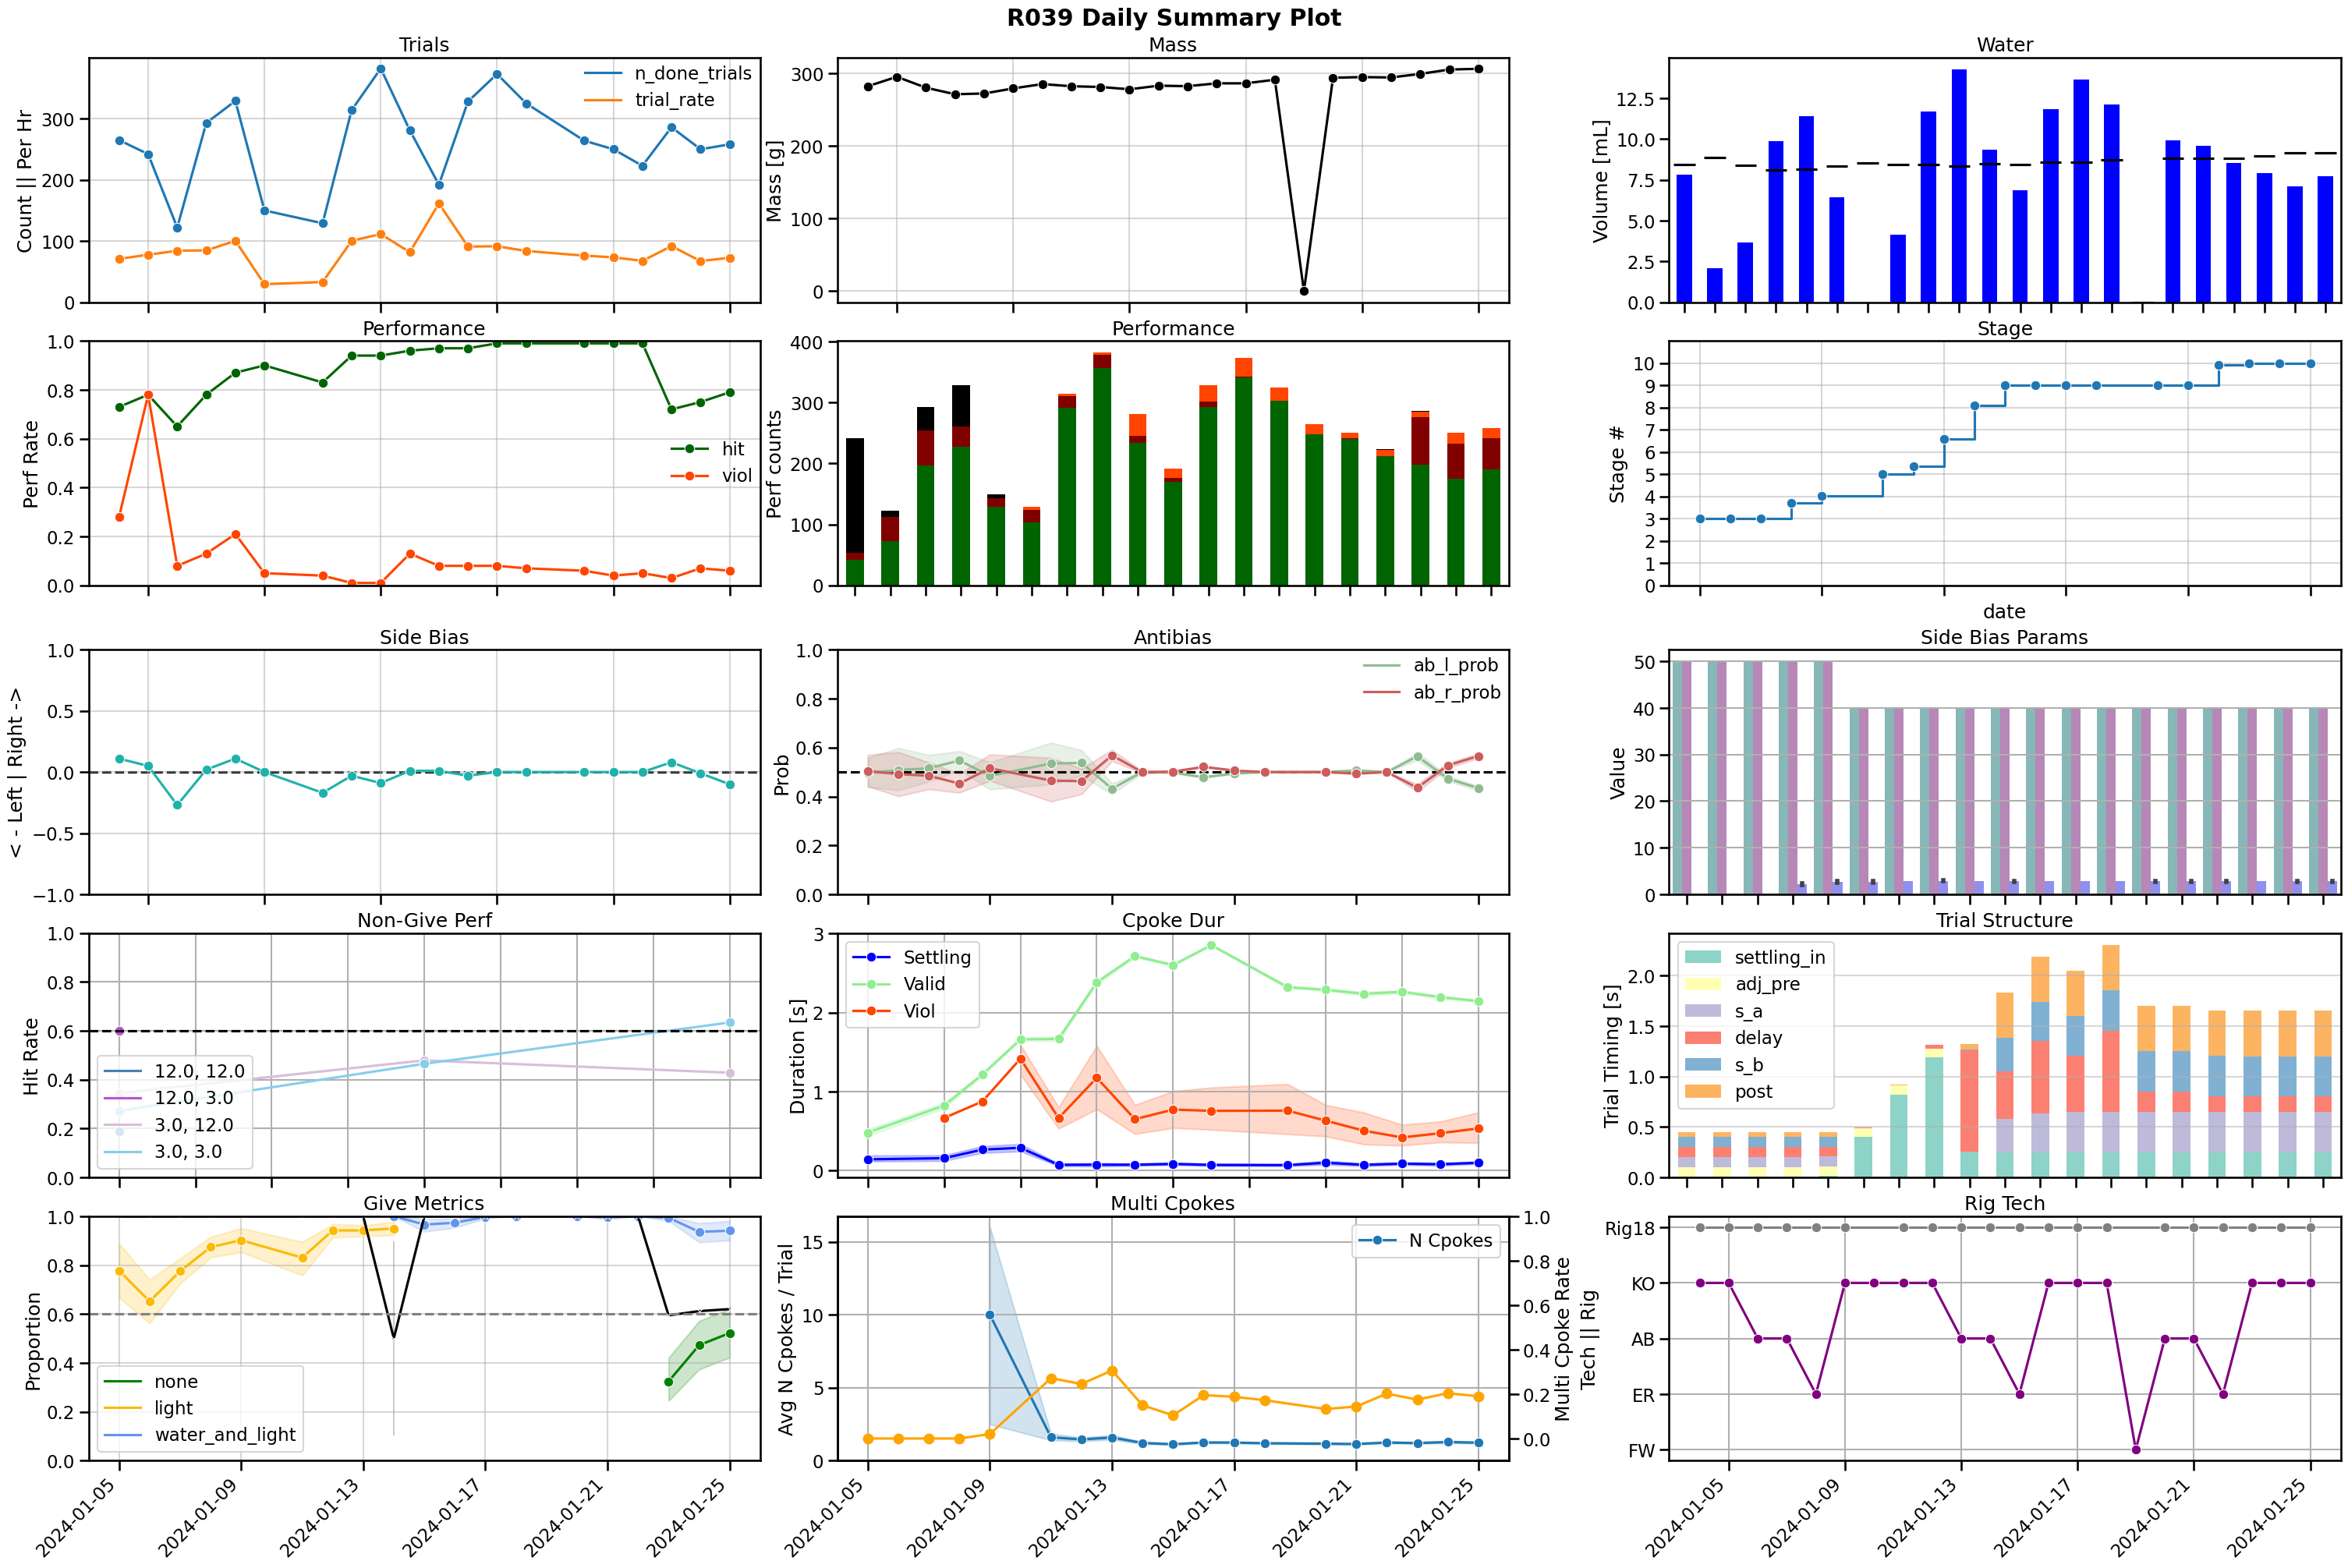

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )
    print(animal_id)

In [9]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R034_2024-01-11_day_summary
in cpoke stage but doesn't fit plot logic!
making R039_2024-01-14_day_summary
in cpoke stage but doesn't fit plot logic!
making R032_2024-01-16_day_summary
in cpoke stage but doesn't fit plot logic!
making R035_2024-01-17_day_summary
in cpoke stage but doesn't fit plot logic!
making R037_2024-01-18_day_summary
in cpoke stage but doesn't fit plot logic!
making R037_2024-01-24_day_summary
in cpoke stage but doesn't fit plot logic!
making R033_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R034_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R035_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R036_2024-01-25_day_summary
making R037_2024-01-25_day_summary
['s_a', 'delay', 's_b', 'post']
making R038_2024-01-25_day_summary
R038 2024-01-25 spoke only stage
making R039_2024-01-25_day_summary
['s_a', 'delay', 's_b']
